# Thesis Notebook

## Section One: DATA Preprocessing


* cleaning data with TRESTLE
* This notebook was copied to test out a balanced dataset.

In [ ]:
import pandas as pd

In [ ]:
# Define regex patterns for text preprocessing
txt_patterns = {
        r'\([^)]*\)': "",
        r'(\w)\1\1': '',
        r'\[.*?\]': "",
        r'&-(\w+)': r'\1',
        r'&+(\w+)': r'\1',
        r'<(\w+)>': r'\1',
        r'\+...': "",
        r'[^A-Za-z\n \']': '',
        r'\s+': ' ',
    }

In [ ]:
sample = {
  "format": ".cha",
  "text_input_path":"C:\\Users\\cobus\\Desktop\\Thesis\\Dementia-20240216T032306Z-001\\Dementia\\sentence",
#   "audio_input_path": "/path/to/audio/recordings",
  "text_output_path": "C:\\Users\\cobus\\Desktop\\Thesis\\dementia_output",
#   "audio_output_path": "/path/to/output/audio/recording",
#   "audio_type": ".mp3",
  "speaker": "*PAR"
  #"content": r'@Bg:	Activity\n.*?@Eg:	Activity'
  }

In [ ]:
# from TRESTLE import TextWrapperProcessor
# wrapper_processor = TextWrapperProcessor(
#     data_loc=sample, txt_patterns=txt_patterns)
# wrapper_processor.process()

In [ ]:
import jsonlines



def grab_text(file):
    texts = []
    with jsonlines.open(file) as reader:
        for obj in reader:
            # Assuming each line of JSONL has a 'text' key
            text = obj.get('text')
            if text:
                texts.append(text)
    return ' '.join(texts)


In [ ]:
pip install numpy --upgrade

In [ ]:
grab_text(r"C:\Users\cobus\Desktop\Thesis\dementia_output\cookie\001-0.jsonl")

In [ ]:
import os
import pandas as pd
folder_path = "C:\\Users\\cobus\\Desktop\\Thesis\\dementia_output"

def dataframe_function():

    folders = os.listdir(folder_path)

    df = []

    for folder_name in folders:
        file_path = os.path.join(folder_path, folder_name)

        for file_name in os.listdir(file_path):
            path = os.path.join(file_path, file_name)


            text = grab_text(path)

            row = {"text": text, "task": folder_name, "file_name": file_name, "label": "dementia"}

            df.append(row)


    return pd.DataFrame(df)

In [ ]:
# control_dataframe = dataframe_function()

# control_dataframe.to_csv("C:\\Users\\cobus\\Desktop\\Thesis\\control_dataframe.csv")

# dementia_dataframe = dataframe_function()

# dementia_dataframe.to_csv("C:\\Users\\cobus\\Desktop\\Thesis\\dementia_dataframe.csv")

In [ ]:
dementia_dataframe = pd.read_csv("C:\\Users\cobus\\Desktop\\Thesis\\dementia_dataframe.csv")

In [ ]:
dementia_dataframe.head()


In [ ]:
control_dataframe = pd.read_csv("C:\\Users\cobus\\Desktop\\Thesis\\control_dataframe.csv")

In [ ]:
# import pandas as pd
# talk_bank = pd.concat([control_dataframe, dementia_dataframe])

In [ ]:
talk_bank.head()

In [ ]:
talk_bank.to_csv("C:\\Users\\cobus\\Desktop\\Thesis\\talk_bank.csv")

In [ ]:
import jsonlines



def grab_text(file):
    texts = []
    with jsonlines.open(file) as reader:
        for obj in reader:
            # Assuming each line of JSONL has a 'text' key
            text = obj.get('text')
            if text:
                texts.append(text)
    return ' '.join(texts)


## Section Two: TFIDF and Machine Learning

In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
import seaborn as sns
from keras.optimizers import Adam
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

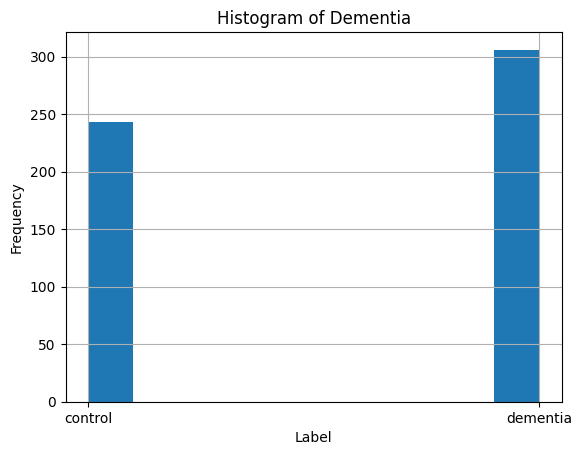

In [ ]:
import matplotlib.pyplot as plt
talk_bank_small['label'].hist()
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Dementia')
plt.show()

In [ ]:
text = talk_bank['text']

In [ ]:
text

### TF-IDF

In [ ]:
talk_bank_small = pd.read_csv("/content/talk_bank_cookie.csv")

In [ ]:
talk_bank_small = talk_bank_small[talk_bank_small['text'].notna()]

In [ ]:
# part_1 = talk_bank[talk_bank.label == 'dementia'].sample(frac = 0.35)

In [ ]:
# part_2 = talk_bank[talk_bank.label == 'control'].sample(frac = 1.0)

In [ ]:
# part_2.shape

In [ ]:
# talk_bank_small = pd.concat([part_1, part_2], axis = 0)

In [ ]:
# talk_bank_small.tail(25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=5, max_df=0.9, ngram_range = (1,1))
X = vectorizer.fit_transform(talk_bank_small['text'].tolist())

In [ ]:

X.shape

(549, 344)

In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\cobus\appdata\roaming\python\python39\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: lime, scikit-learn-intelex, sentence-transformers, shap
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#checking the weights assigned to each word

sorted([x for x in zip(vectorizer.get_feature_names_out(), vectorizer.idf_)], key=lambda x:x[1], reverse=True)

[('action going', 5.518158808998462),
 ('alright little', 5.518158808998462),
 ('blowing uh', 5.518158808998462),
 ('boy hand', 5.518158808998462),
 ('brother taking', 5.518158808998462),
 ('cabinet door', 5.518158808998462),
 ('cookie brother', 5.518158808998462),
 ('cookie falling', 5.518158808998462),
 ('cookie looks', 5.518158808998462),
 ('cookie sister', 5.518158808998462),
 ('cookies falling', 5.518158808998462),
 ('cookies standing', 5.518158808998462),
 ('couple dishes', 5.518158808998462),
 ('cup saucer', 5.518158808998462),
 ('cupboard open', 5.518158808998462),
 ('curtains pulled', 5.518158808998462),
 ('did did', 5.518158808998462),
 ('dish cups', 5.518158808998462),
 ('dishes children', 5.518158808998462),
 ('dishes guess', 5.518158808998462),
 ('dishes sitting', 5.518158808998462),
 ('dishes spilled', 5.518158808998462),
 ('dishes window', 5.518158808998462),
 ('doesn look', 5.518158808998462),
 ('don want', 5.518158808998462),
 ('door cabinet', 5.518158808998462),
 ('dr

In [ ]:
X = X.toarray()
y= np.array(talk_bank_small['label'].tolist())

In [ ]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 50)

In [ ]:
print(X_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.08797176 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
y_train_nums = (y_train == 'dementia').astype('int')
y_test_nums = (y_test == 'dementia').astype('int')

In [ ]:
models_f1 = []
models_f1.append((LogisticRegression()))
#models.append(('GSearch', LinearDiscriminantAnalysis()))
models_f1.append(( KNeighborsClassifier()))
models_f1.append((DecisionTreeClassifier()))
models_f1.append((MultinomialNB()))
# models_f1.append((SVC(kernel="linear", C=0.1,probability=True)))
models_f1.append((RandomForestClassifier()))
models_f1.append((AdaBoostClassifier()))

## Exploring Machine Learning Methods
* Logistic regression
* knn
* DT
* mnb
* rf
* ada

LogisticRegression
****Results****
Accuracy: 75.4545%
****F1 score,Precision and recall****
f1_score: 0.7485394970789941 , Precison: 0.7605042016806722, Recall: 0.7472582253240279, Individual_f1: [0.70967742 0.78740157]
(array([0.78571429, 0.73529412]), array([0.64705882, 0.84745763]), array([0.70967742, 0.78740157]), array([51, 59]))
***confusion matrix****


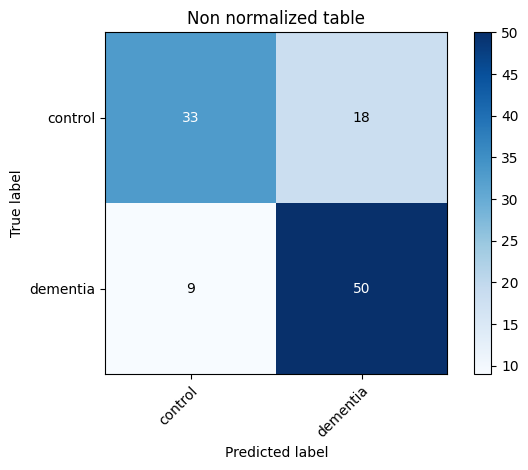

Log Loss: 0.5544868257878209
KNeighborsClassifier
****Results****
Accuracy: 66.3636%
****F1 score,Precision and recall****
f1_score: 0.6613694982943672 , Precison: 0.6616666666666666, Recall: 0.6611831173147225, Individual_f1: [0.63366337 0.68907563]
(array([0.64      , 0.68333333]), array([0.62745098, 0.69491525]), array([0.63366337, 0.68907563]), array([51, 59]))
***confusion matrix****


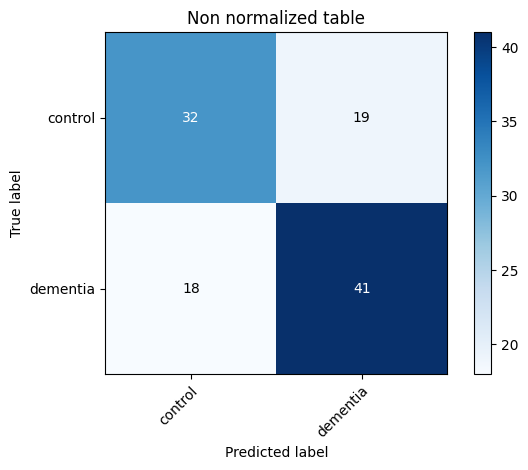

Log Loss: 0.8721578572684384
DecisionTreeClassifier
****Results****
Accuracy: 66.3636%
****F1 score,Precision and recall****
f1_score: 0.662268691394905 , Precison: 0.6621352785145889, Recall: 0.6625124626121635, Individual_f1: [0.6407767  0.68376068]
(array([0.63461538, 0.68965517]), array([0.64705882, 0.6779661 ]), array([0.6407767 , 0.68376068]), array([51, 59]))
***confusion matrix****


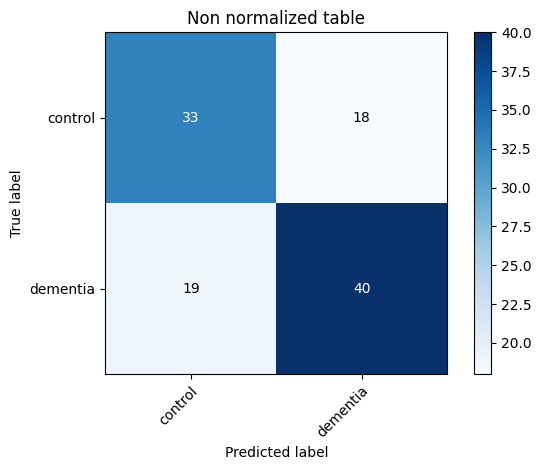

Log Loss: 12.123774321793952
MultinomialNB
****Results****
Accuracy: 71.8182%
****F1 score,Precision and recall****
f1_score: 0.7128421052631579 , Precison: 0.7196969696969697, Recall: 0.7120305749418412, Individual_f1: [0.67368421 0.752     ]
(array([0.72727273, 0.71212121]), array([0.62745098, 0.79661017]), array([0.67368421, 0.752     ]), array([51, 59]))
***confusion matrix****


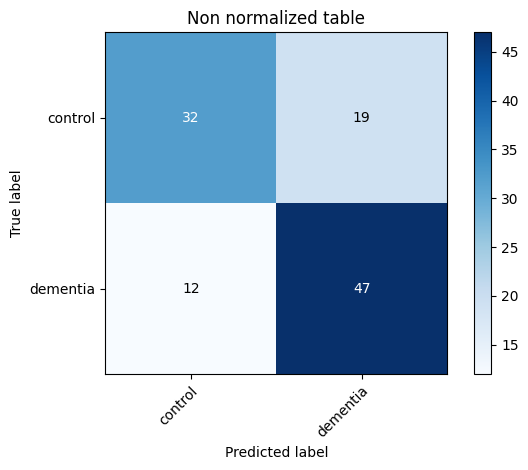

Log Loss: 0.5448425943632208
RandomForestClassifier
****Results****
Accuracy: 75.4545%
****F1 score,Precision and recall****
f1_score: 0.7520661157024793 , Precison: 0.7540322580645161, Recall: 0.751246261216351, Individual_f1: [0.72727273 0.7768595 ]
(array([0.75      , 0.75806452]), array([0.70588235, 0.79661017]), array([0.72727273, 0.7768595 ]), array([51, 59]))
***confusion matrix****


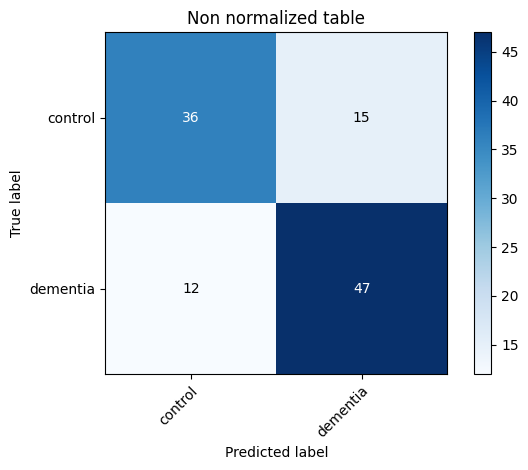

Log Loss: 0.5249767413720502
AdaBoostClassifier
****Results****
Accuracy: 65.4545%
****F1 score,Precision and recall****
f1_score: 0.6488575268817204 , Precison: 0.652991452991453, Recall: 0.648720505151213, Individual_f1: [0.60416667 0.69354839]
(array([0.64444444, 0.66153846]), array([0.56862745, 0.72881356]), array([0.60416667, 0.69354839]), array([51, 59]))
***confusion matrix****


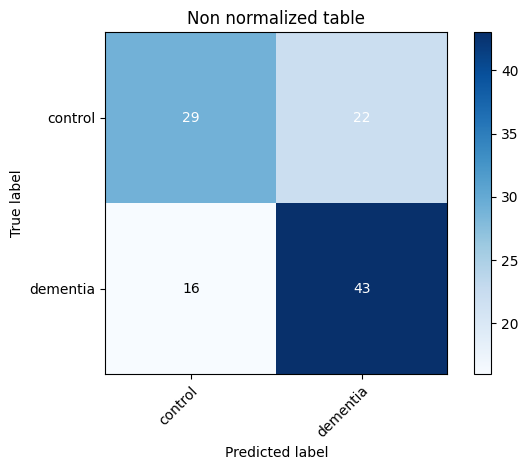

Log Loss: 0.6813628218111136


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
for clf in models_f1:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    print('****F1 score,Precision and recall****')
    f1_score = sklearn.metrics.f1_score(y_test, train_predictions,average='macro')
    Precision = sklearn.metrics.precision_score(y_test, train_predictions,average='macro')
    Recall = sklearn.metrics.recall_score(y_test, train_predictions,average='macro')
    individual_f1 = sklearn.metrics.f1_score(y_test, train_predictions, average=None)
    print("f1_score: {} , Precison: {}, Recall: {}, Individual_f1: {}".format(f1_score,Precision,Recall,individual_f1))
    print(precision_recall_fscore_support(y_test, train_predictions, average=None, labels=talk_bank_small['label'].unique()))
    print('***confusion matrix****')
    classes = talk_bank_small['label'].unique()
    cm = confusion_matrix(y_test, train_predictions)
    fig, ax = plt.subplots()
    cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title="Non normalized table",
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    normalize = False
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
#     log = log.append(log_entry)

In [ ]:
# pickle.dump(models_f1[0], open('C:\\Users\\cobus\\Desktop\\Thesis\\lr_model_bigrams.pickle', 'wb'))

# RANDOM FOREST

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
print(model_rf)
y_pred = model_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

labels = [0, 1]
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average=None, labels= labels))
print(classification_report(y_test,y_pred))

RandomForestClassifier()
0.7727272727272727
[[35 16]
 [ 9 50]]
(array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0, 0]))
              precision    recall  f1-score   support

     control       0.80      0.69      0.74        51
    dementia       0.76      0.85      0.80        59

    accuracy                           0.77       110
   macro avg       0.78      0.77      0.77       110
weighted avg       0.78      0.77      0.77       110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle
pickle.dump(model_rf, open('C:\\Users\\cobus\\Desktop\\Thesis\\rf_model.pickle', 'wb'))

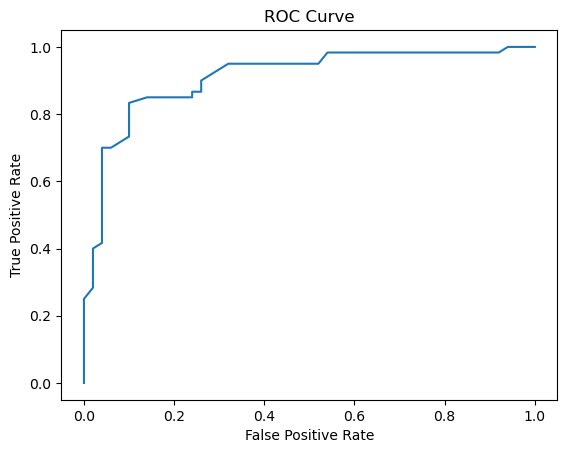

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
y_probas = model_rf.predict_proba(X_test)[:,1]
#skplt.metrics.plot_roc_curve(y_test, y_probas)
fpr, tpr, thresholds = roc_curve(y_test, y_probas, pos_label = 'dementia')
#roc_auc = roc_auc_score(y_test, scores)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()


# Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
print(model_dt)
y_pred = model_dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)

labels = [0, 1]
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average=None, labels= labels))
print(classification_report(y_test,y_pred))

DecisionTreeClassifier()
0.6818181818181818
[[38 13]
 [22 37]]
(array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0, 0]))
              precision    recall  f1-score   support

     control       0.63      0.75      0.68        51
    dementia       0.74      0.63      0.68        59

    accuracy                           0.68       110
   macro avg       0.69      0.69      0.68       110
weighted avg       0.69      0.68      0.68       110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


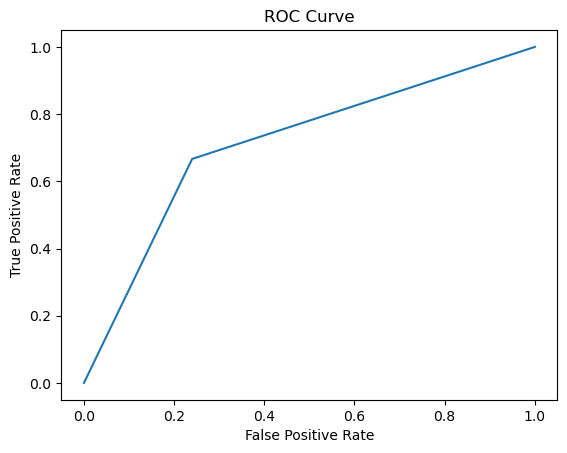

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
y_probas = model_dt.predict_proba(X_test)[:,1]
#skplt.metrics.plot_roc_curve(y_test, y_probas)
fpr, tpr, thresholds = roc_curve(y_test, y_probas, pos_label = 'dementia')
#roc_auc = roc_auc_score(y_test, scores)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()


In [ ]:
grid_list= [
    {'solver': ['saga'], 'penalty': ['l1', 'l2', None, 'elasticnet'], 'C':[1.0, .5, .3, .01], 'fit_intercept': [True, False]},
    {'n_neighbors': [5, 7, 3, 10, 4], 'weights': ['uniform', 'distance']},
    {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [None, 5, 10, 2], 'max_features': ['sqrt', 'log2', 3, None]},
    {'alpha': [0, 1, .5, .1, .01]},
#     {'C':[.5, 1, 2, 10], 'kernel': ['linear', 'poly', 'rbf', 'precomputed', 'sigmoid'], 'degree': [3, 2, 4], 'gamma': ['scale', 'auto']},
    {'n_estimators':[100, 50, 150], 'criterion':['gini', 'entropy', 'log_loss'], 'max_depth': [5,3, 2], 'max_features': ['sqrt', 'log2', 3, None]},
    {'n_estimators':[100, 50, 150, 25], 'learning_rate': [1, .5, .1, .01]}

]

C:\Users\cobus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

LogisticRegression
****Results****
Accuracy: 79.0909%
****F1 score,Precision and recall****
f1_score: 0.7879473640097225 , Precison: 0.7864739115985377, Recall: 0.7927989130434783, Individual_f1: [0.7628866  0.81300813]
(array([0.7254902 , 0.84745763]), array([0.80434783, 0.78125   ]), array([0.7628866 , 0.81300813]), array([46, 64], dtype=int64))
***confusion matrix****


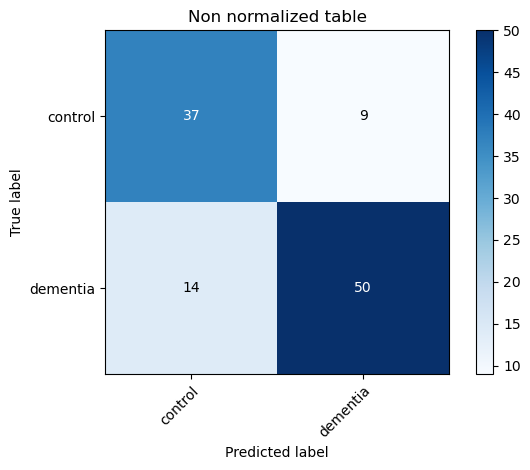

Log Loss: 0.4943023372177839


C:\Users\cobus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\cobus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier
****Results****
Accuracy: 70.9091%
****F1 score,Precision and recall****
f1_score: 0.7087057265806024 , Precison: 0.7419467787114846, Recall: 0.7347146739130435, Individual_f1: [0.71929825 0.69811321]
(array([0.60294118, 0.88095238]), array([0.89130435, 0.578125  ]), array([0.71929825, 0.69811321]), array([46, 64], dtype=int64))
***confusion matrix****


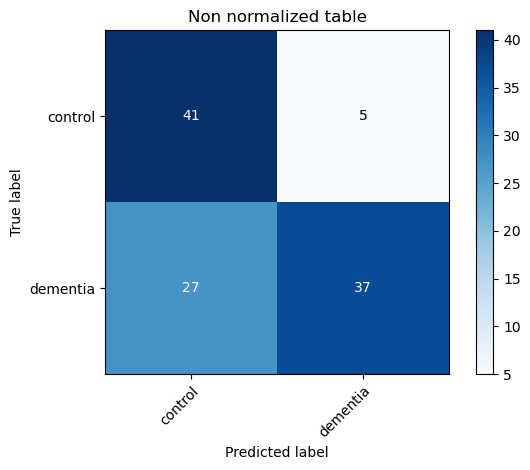

Log Loss: 0.8025761124077802


C:\Users\cobus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cobus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cobus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\cobus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

DecisionTreeClassifier
****Results****
Accuracy: 70.9091%
****F1 score,Precision and recall****
f1_score: 0.7043010752688172 , Precison: 0.7033333333333334, Recall: 0.7072010869565217, Individual_f1: [0.66666667 0.74193548]
(array([0.64      , 0.76666667]), array([0.69565217, 0.71875   ]), array([0.66666667, 0.74193548]), array([46, 64], dtype=int64))
***confusion matrix****


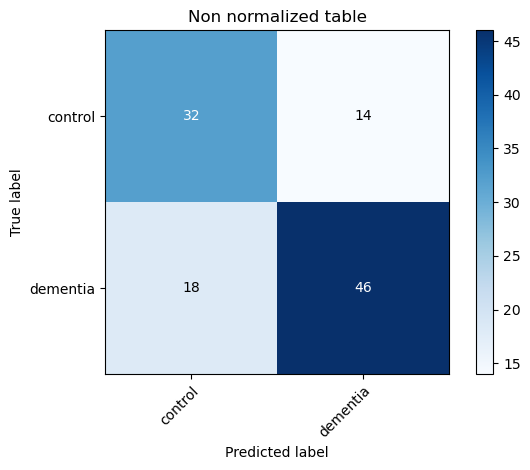

Log Loss: 4.149688563443388
MultinomialNB
****Results****
Accuracy: 79.0909%
****F1 score,Precision and recall****
f1_score: 0.7894999583992013 , Precison: 0.7909090909090909, Recall: 0.7989130434782609, Individual_f1: [0.77227723 0.80672269]
(array([0.70909091, 0.87272727]), array([0.84782609, 0.75      ]), array([0.77227723, 0.80672269]), array([46, 64], dtype=int64))
***confusion matrix****


C:\Users\cobus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


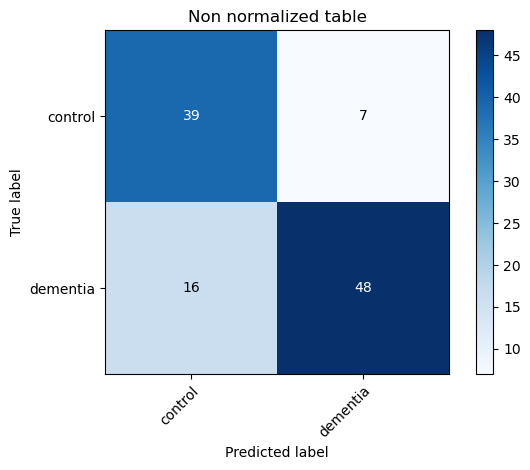

Log Loss: 0.4984373540507077


C:\Users\cobus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cobus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cobus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\cobus\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\cobus\anaconda3\lib\site-packages

RandomForestClassifier
****Results****
Accuracy: 77.2727%
****F1 score,Precision and recall****
f1_score: 0.7623368766744447 , Precison: 0.7693531283138919, Recall: 0.7588315217391304, Individual_f1: [0.71264368 0.81203008]
(array([0.75609756, 0.7826087 ]), array([0.67391304, 0.84375   ]), array([0.71264368, 0.81203008]), array([46, 64], dtype=int64))
***confusion matrix****


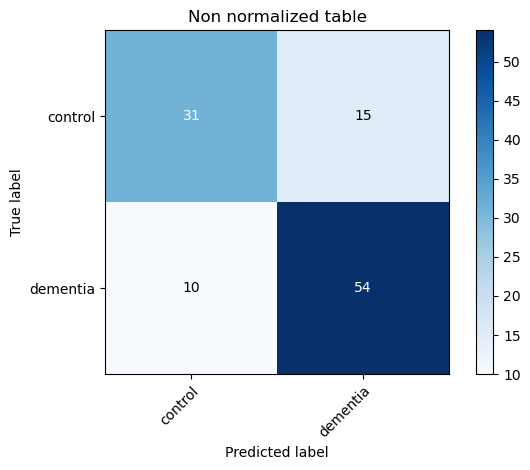

Log Loss: 0.5549621119169901
AdaBoostClassifier
****Results****
Accuracy: 72.7273%
****F1 score,Precision and recall****
f1_score: 0.7179487179487178 , Precison: 0.7196969696969697, Recall: 0.7167119565217391, Individual_f1: [0.66666667 0.76923077]
(array([0.68181818, 0.75757576]), array([0.65217391, 0.78125   ]), array([0.66666667, 0.76923077]), array([46, 64], dtype=int64))
***confusion matrix****


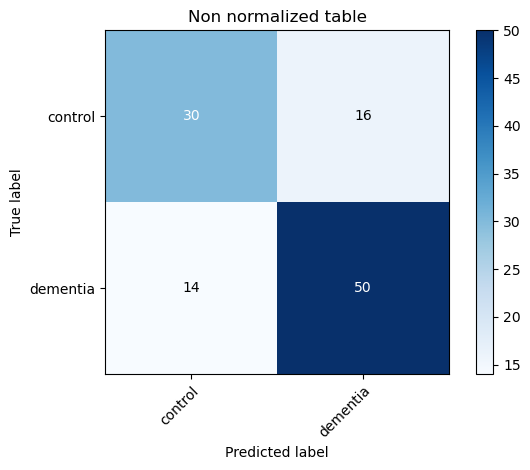

Log Loss: 0.6518593935827809


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
%matplotlib inline
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for (clf, grid) in zip(models_f1, grid_list):
    gridsearch = GridSearchCV(clf, grid, scoring = 'precision')
    gridsearch.fit(X_train, y_train_nums)
    name = clf.__class__.__name__

    best = gridsearch.best_estimator_
    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = best.predict(X_test)
    acc = accuracy_score(y_test_nums, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    print('****F1 score,Precision and recall****')
    f1_score = sklearn.metrics.f1_score(y_test_nums, train_predictions,average='macro')
    Precision = sklearn.metrics.precision_score(y_test_nums, train_predictions,average='macro')
    Recall = sklearn.metrics.recall_score(y_test_nums, train_predictions,average='macro')
    individual_f1 = sklearn.metrics.f1_score(y_test_nums, train_predictions, average=None)
    print("f1_score: {} , Precison: {}, Recall: {}, Individual_f1: {}".format(f1_score,Precision,Recall,individual_f1))
    print(precision_recall_fscore_support(y_test_nums, train_predictions, average=None))
    print('***confusion matrix****')
    classes = talk_bank_small['label'].unique()
    cm = confusion_matrix(y_test_nums, train_predictions)
    fig, ax = plt.subplots()
    cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title="Non normalized table",
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    normalize = False
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

    train_predictions = best.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
#     log = log.append(log_entry)

In [ ]:
print(y_train)

['dementia' 'control' 'control' 'dementia' 'control' 'control' 'dementia'
 'dementia' 'control' 'control' 'dementia' 'dementia' 'dementia'
 'dementia' 'dementia' 'dementia' 'dementia' 'dementia' 'dementia'
 'dementia' 'control' 'control' 'control' 'control' 'dementia' 'dementia'
 'control' 'control' 'dementia' 'dementia' 'control' 'dementia' 'dementia'
 'dementia' 'dementia' 'control' 'control' 'dementia' 'dementia' 'control'
 'dementia' 'control' 'control' 'control' 'control' 'dementia' 'control'
 'control' 'control' 'control' 'control' 'dementia' 'control' 'dementia'
 'dementia' 'dementia' 'dementia' 'control' 'control' 'control' 'control'
 'control' 'dementia' 'dementia' 'dementia' 'control' 'control' 'dementia'
 'dementia' 'control' 'dementia' 'dementia' 'control' 'control' 'dementia'
 'dementia' 'dementia' 'dementia' 'dementia' 'dementia' 'dementia'
 'dementia' 'dementia' 'control' 'dementia' 'control' 'control' 'control'
 'control' 'control' 'dementia' 'dementia' 'dementia' 'deme

In [ ]:
list= [
    {'penalty': ['l1', 'l2', None, 'elasticnet'], 'C':[1.0, .5, .3, .01]. 'fit_intercept': [True, False]},
    {'n_neighbors': [5, 7, 3, 10, 4], 'weights': ['uniform', 'distance']},
    {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [None, 5, 10, 2], 'max_features': ['sqrt', 'log2', 3, None]},
    {'alpha': [0, 1, .5, .1, .01]},
    {'C':[.5, 1, 2, 10], 'kernel': ['linear', 'poly', 'rbf', 'precomputed', 'sigmoid'], 'degree': [3, 2, 4], 'gamma': ['scale', 'auto']},
    {'n_estimators':[100, 50, 150], 'criterion':['gini', 'entropy', 'log_loss'], 'max_depth': [5,3, 2], 'max_features': ['sqrt', 'log2', 3, None]},
    {'n_estimators':[100, 50, 150, 25], 'learning_rate': [1, .5, .1, .01]}

]

## Section Three: GLOVE EMBEDDINGS
## *And Deep Learning Models*


In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
#code for Glove word embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

x = talk_bank_small['text']

# create the dict.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

# number of unique words in dict.
print("Number of unique words in dictionary=",
      len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)

# download glove and unzip it in Notebook.
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip

# vocab: 'the': 1, mapping of words with
# integers in seq. 1,2,3..
# embedding: 1->dense vector
def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1

    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab


# matrix for vocab: word_index
embedding_dim = 100
embedding_matrix_vocab = embedding_for_vocab(
    "C:\\Users\\cobus\\Desktop\\Thesis\\glove.42B.300d\\glove.42B.300d.txt", tokenizer.word_index,
  embedding_dim)

print("Dense vector for first word is => ",
      embedding_matrix_vocab[1])

In [ ]:
embedding_matrix_vocab.shape

(1671, 100)

In [ ]:
print(embedding_matrix_vocab)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.20838    -0.14932001 -0.017528   ... -0.39842001  0.16796
  -0.12894   ]
 [-0.09611    -0.25788    -0.35859999 ... -0.13131     0.017387
   0.23243999]
 ...
 [ 0.20716999  0.45528999 -0.31481999 ...  0.63731998  0.77844
   0.21586999]
 [ 0.025372   -0.67276001 -0.18442    ...  0.32157001  0.34077999
   0.44060001]
 [-0.10802     0.15158001  0.40698001 ...  0.13173001 -0.94213998
  -0.1285    ]]


# Deep Learning

* LSTM

* Bi-direcitonal LSTM

* CNN-LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout,Conv1D, Flatten, MaxPooling1D, Dense, LSTM,Conv1D,MaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
# from keras.constraints import maxnorm
from keras.preprocessing import sequence
from keras.callbacks import History
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Splitting data


X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(talk_bank_small['text'], talk_bank_small['label'], test_size = 0.2, random_state = 100, stratify = y)

# y_nums_train = [int(y =='dementia') for y in y_seq_train]

y_nums_train = (y_seq_train == 'dementia').astype(int)


In [ ]:
y_nums_test = (y_seq_test == 'dementia').astype(int)

In [ ]:
# tokenizer = Tokenizer(num_words = 2500)
# tokenizer.fit_on_texts(X_seq_train)

Xwords_train = tokenizer.texts_to_sequences(X_seq_train)
Xwords_test = tokenizer.texts_to_sequences(X_seq_test)

In [ ]:
#Padding the sentence sequences

max_review_length = 100
Xwords_train = pad_sequences(Xwords_train, maxlen=max_review_length)
Xwords_test = pad_sequences(Xwords_test, maxlen=max_review_length)

In [ ]:
print(Xwords_train.shape)
print(Xwords_test.shape)
print(y_nums_train.shape)
print(y_seq_test.shape)

(439, 100)
(110, 100)
(439,)
(110,)


In [ ]:
vocab = len(tokenizer.word_index) + 1   # Add one for the zero indexing
vocab

1671

In [ ]:
#setting history parameter to record accuracy and loss info of model

history = History()

## LSTM

In [ ]:
#  Xwords_train = np.array(Xwords_train)

In [ ]:
history = History()

model = Sequential()
model.add(Embedding(input_dim = vocab, output_dim = 100, weights = [embedding_matrix_vocab], input_length=100, trainable = False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          167100    
                                                                 
 lstm_12 (LSTM)              (None, 128)               117248    
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 284,477
Trainable params: 117,377
Non-trainable params: 167,100
_________________________________________________________________
None


In [ ]:
import os
import tensorflow as tf

checkpoint_path = r"C:\Users\cobus\Desktop\Thesis\check_point"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor="val_loss", save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(Xwords_train, y_nums_train, epochs=50, batch_size=256,verbose = 1,callbacks = [history, cp_callback],validation_split=0.1)  # Pass callback to training


Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 0.7005 - accuracy: 0.5291 
Epoch 1: val_loss improved from inf to 0.73023, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 22s 3s/step - loss: 0.7005 - accuracy: 0.5291 - val_loss: 0.7302 - val_accuracy: 0.4773
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.5722
Epoch 2: val_loss improved from 0.73023 to 0.69898, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 4s 2s/step - loss: 0.6812 - accuracy: 0.5722 - val_loss: 0.6990 - val_accuracy: 0.5227
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.5924
Epoch 3: val_loss improved from 0.69898 to 0.69460, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 4s 2s/step - loss: 0.6791 - accuracy: 0.5924 - val_loss: 0.6946 - val_accuracy: 0.5682
Epoch 4/50
2/2 [==

2/2 [==============================] - 5s 2s/step - loss: 0.4648 - accuracy: 0.7646 - val_loss: 0.6329 - val_accuracy: 0.7273
Epoch 30/50
2/2 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.7823
Epoch 30: val_loss did not improve from 0.62777
2/2 [==============================] - 5s 2s/step - loss: 0.4531 - accuracy: 0.7823 - val_loss: 0.6457 - val_accuracy: 0.7500
Epoch 31/50
2/2 [==============================] - ETA: 0s - loss: 0.4732 - accuracy: 0.7823
Epoch 31: val_loss did not improve from 0.62777
2/2 [==============================] - 4s 2s/step - loss: 0.4732 - accuracy: 0.7823 - val_loss: 0.6321 - val_accuracy: 0.7500
Epoch 32/50
2/2 [==============================] - ETA: 0s - loss: 0.4234 - accuracy: 0.8025
Epoch 32: val_loss did not improve from 0.62777
2/2 [==============================] - 4s 2s/step - loss: 0.4234 - accuracy: 0.8025 - val_loss: 0.6315 - val_accuracy: 0.7273
Epoch 33/50
2/2 [==============================] - ETA: 0s - loss: 0.4534

In [ ]:
os.listdir(checkpoint_dir)


['.ipynb_checkpoints',
 '22ASHA-Saylor.pdf',
 '2305.13331.pdf',
 'checkpoint',
 'check_point.data-00000-of-00001',
 'check_point.index',
 'Comparative_study_of_Deep_Classifiers_for_Early_Dementia_Detection_using_Speech_Transcripts.pdf',
 'Control-20240216T032309Z-001',
 'control_dataframe.csv',
 'control_output',
 'data augmentation.ipynb',
 'Dementia Detection from Speech Using Machine Learning.pdf',
 'Dementia-20240216T032306Z-001',
 'Dementia_classification_using_attention_mechanism_on_audio_data.pdf',
 'dementia_dataframe.csv',
 'dementia_output',
 'GitHubDesktopSetup-x64 (1).exe',
 'glove.42B.300d',
 'glove.42B.300d.zip',
 'harmonized-toolkit-main',
 'lit-review-writing.docx',
 'LITERATURE REVIEW DRAFT.docx',
 'part.csv',
 'requirements.txt',
 'saved_models',
 'Stacked_Deep_Dense_Neural_Network_Model_to_Predict_Alzheimers_Dementia_Using_Audio_Transcript_Data.pdf',
 'Tackling_the_ADReSS_challenge.pdf',
 'talk_bank.csv',
 'talk_bank_small.csv',
 'talk_bank_small_old.csv',
 'thesis-t

In [ ]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(Xwords_test, y_nums_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 0s - loss: 0.5200 - accuracy: 0.7545 - 492ms/epoch - 123ms/step
Restored model, accuracy: 75.45%


In [ ]:
model.save('saved_models/model_glove_lstm_small.h5')

4/4 [==============================] - 1s 94ms/step


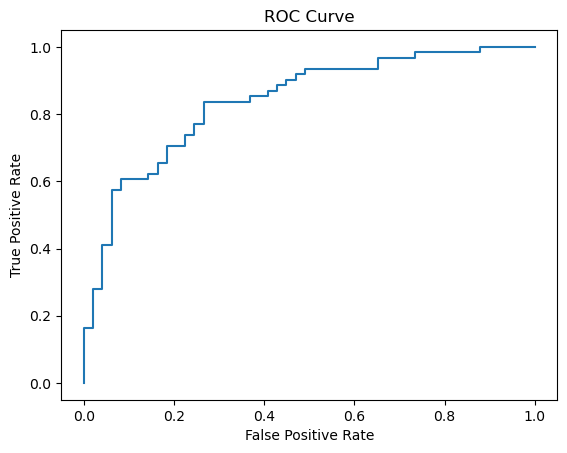

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
y_pred_probas = model.predict(Xwords_test)
y_pred_probas = [i[0] for i in y_pred_probas]
fpr, tpr, thresholds = roc_curve(y_seq_test, y_pred_probas, pos_label = 'dementia')
# roc_auc = roc_auc_score(y_test, scores)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()

In [ ]:
#predicting classes on test data
from sklearn.metrics import f1_score
predict_x=model.predict(Xwords_test)

score = []
for theshold in np.arange(0,1,.01):
    classes_x= (predict_x >= theshold).astype(int)
    ideal_score = f1_score(y_nums_test, classes_x)

    score.append(ideal_score)

final = np.argmax(score)

print(final)



4/4 [==============================] - 0s 107ms/step
42


In [ ]:
final = final/100
classes_x = (predict_x >= final).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

print(confusion_matrix(y_nums_test, classes_x))
print(classification_report(y_nums_test, classes_x))

[[36 13]
 [10 51]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76        49
           1       0.80      0.84      0.82        61

    accuracy                           0.79       110
   macro avg       0.79      0.79      0.79       110
weighted avg       0.79      0.79      0.79       110



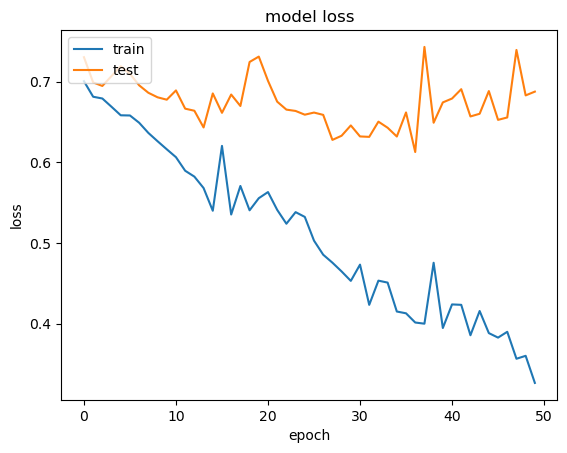

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

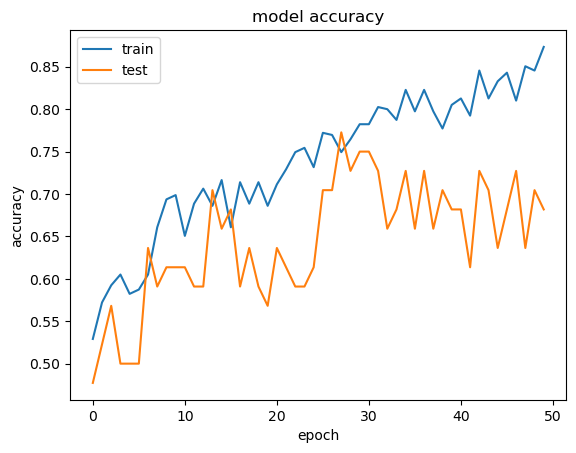

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###  Bidirectional LSTM

In [ ]:

history = History()
model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim = vocab, output_dim = 100, weights = [embedding_matrix_vocab], input_length=100, trainable = False))
model_bilstm.add(Bidirectional(LSTM(128, recurrent_dropout=0.2)))
model_bilstm.add(Dense(1, activation='sigmoid'))
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_bilstm.summary())


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 100)          167100    
                                                                 
 bidirectional_6 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 401,853
Trainable params: 234,753
Non-trainable params: 167,100
_________________________________________________________________
None


In [ ]:
import os
import tensorflow as tf

checkpoint_path = r"C:\Users\cobus\Desktop\Thesis\check_point"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor="val_loss", save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model_bilstm.fit(Xwords_train, y_nums_train, epochs=20, batch_size=50,verbose = 1,callbacks = [history, cp_callback],validation_split=0.1)  # Pass callback to training


Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.5595
Epoch 1: val_loss improved from inf to 0.73481, saving model to C:\Users\cobus\Desktop\Thesis\check_point
8/8 [==============================] - 17s 1s/step - loss: 0.6820 - accuracy: 0.5595 - val_loss: 0.7348 - val_accuracy: 0.4545
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6430 - accuracy: 0.6329
Epoch 2: val_loss improved from 0.73481 to 0.70581, saving model to C:\Users\cobus\Desktop\Thesis\check_point
8/8 [==============================] - 10s 1s/step - loss: 0.6430 - accuracy: 0.6329 - val_loss: 0.7058 - val_accuracy: 0.4773
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.5977 - accuracy: 0.6937
Epoch 3: val_loss improved from 0.70581 to 0.62947, saving model to C:\Users\cobus\Desktop\Thesis\check_point
8/8 [==============================] - 10s 1s/step - loss: 0.5977 - accuracy: 0.6937 - val_loss: 0.6295 - val_accuracy: 0.7045
Epoch 4/20
8/8 [=

In [ ]:
os.listdir(checkpoint_dir)

['.ipynb_checkpoints',
 '22ASHA-Saylor.pdf',
 '2305.13331.pdf',
 'checkpoint',
 'check_point.data-00000-of-00001',
 'check_point.index',
 'Comparative_study_of_Deep_Classifiers_for_Early_Dementia_Detection_using_Speech_Transcripts.pdf',
 'Control-20240216T032309Z-001',
 'Control-20240216T032309Z-001.zip',
 'control_dataframe.csv',
 'control_output',
 'control_sentences.csv',
 'data augmentation.ipynb',
 'Dementia Detection from Speech Using Machine Learning.pdf',
 'Dementia-20240216T032306Z-001',
 'Dementia-20240216T032306Z-001.zip',
 'Dementia_classification_using_attention_mechanism_on_audio_data.pdf',
 'dementia_dataframe.csv',
 'dementia_output',
 'dementia_sentences.csv',
 'GitHubDesktopSetup-x64 (1).exe',
 'glove.42B.300d',
 'glove.42B.300d.zip',
 'harmonized-toolkit-main',
 'lit-review-writing.docx',
 'LITERATURE REVIEW DRAFT.docx',
 'part.csv',
 'requirements.txt',
 'saved_models',
 'Stacked_Deep_Dense_Neural_Network_Model_to_Predict_Alzheimers_Dementia_Using_Audio_Transcript_D

In [ ]:
# Loads the weights
model_bilstm.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model_bilstm.evaluate(Xwords_test, y_nums_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 1s - loss: 0.5716 - accuracy: 0.6909 - 823ms/epoch - 206ms/step
Restored model, accuracy: 69.09%


In [ ]:
model_bilstm.save('saved_models/model_glove_bilstm_small.h5')

4/4 [==============================] - 1s 187ms/step


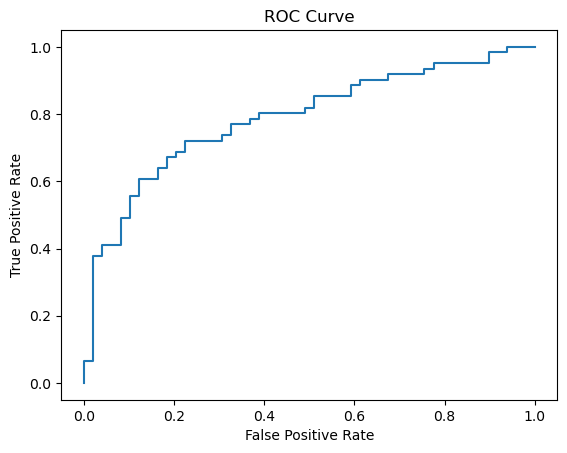

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
y_pred_probas = model_bilstm.predict(Xwords_test)
y_pred_probas = [i[0] for i in y_pred_probas]
fpr, tpr, thresholds = roc_curve(y_seq_test, y_pred_probas, pos_label = 'dementia')
#roc_auc = roc_auc_score(y_test, scores)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()

In [ ]:
#predicting classes on test data
from sklearn.metrics import f1_score
predict_x=model_bilstm.predict(Xwords_test)

score = []
for theshold in np.arange(0,1,.01):
    classes_x= (predict_x >= theshold).astype(int)
    ideal_score = f1_score(y_nums_test, classes_x)

    score.append(ideal_score)

final = np.argmax(score)

print(final)


4/4 [==============================] - 1s 174ms/step
53


In [ ]:
final = final/100
classes_x = (predict_x >= final).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

print(confusion_matrix(y_nums_test, classes_x))
print(classification_report(y_nums_test, classes_x))

[[30 19]
 [12 49]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66        49
           1       0.72      0.80      0.76        61

    accuracy                           0.72       110
   macro avg       0.72      0.71      0.71       110
weighted avg       0.72      0.72      0.71       110



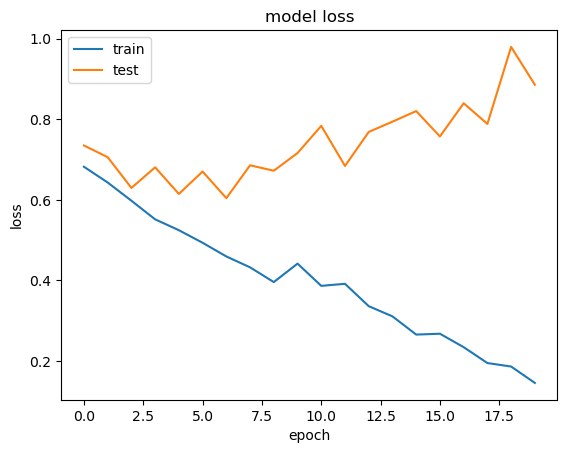

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

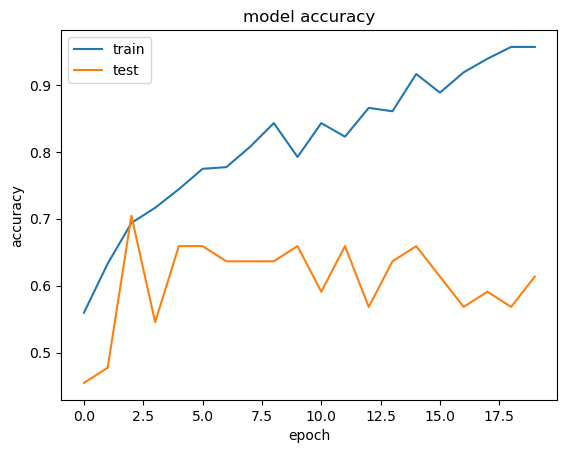

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNN LSTM



In [ ]:
history = History()
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(input_dim = vocab, output_dim = 100, weights = [embedding_matrix_vocab], input_length=100, trainable = False))
    model_conv.add(Dropout(0.1))
    model_conv.add(Conv1D(32, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(64))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model_conv

In [ ]:
import os
import tensorflow as tf

checkpoint_path = r"C:\Users\cobus\Desktop\Thesis\check_point"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor="val_loss", save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback

model_conv1 = create_conv_model()
model_conv1.fit(Xwords_train, y_nums_train, epochs=50, batch_size=256,verbose = 1,callbacks = [history, cp_callback],validation_split=0.1)  # Pass callback to training



Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.5620
Epoch 1: val_loss improved from inf to 0.71536, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 4s 926ms/step - loss: 0.6940 - accuracy: 0.5620 - val_loss: 0.7154 - val_accuracy: 0.4773
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 0.6882 - accuracy: 0.5722
Epoch 2: val_loss improved from 0.71536 to 0.69303, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 1s 460ms/step - loss: 0.6882 - accuracy: 0.5722 - val_loss: 0.6930 - val_accuracy: 0.4773
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.5671
Epoch 3: val_loss did not improve from 0.69303
2/2 [==============================] - 1s 169ms/step - loss: 0.6759 - accuracy: 0.5671 - val_loss: 0.6951 - val_accuracy: 0.4773
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 0.6697 -

Epoch 28/50
2/2 [==============================] - ETA: 0s - loss: 0.3608 - accuracy: 0.8557
Epoch 28: val_loss did not improve from 0.52110
2/2 [==============================] - 1s 284ms/step - loss: 0.3608 - accuracy: 0.8557 - val_loss: 0.5259 - val_accuracy: 0.7500
Epoch 29/50
2/2 [==============================] - ETA: 0s - loss: 0.3482 - accuracy: 0.8582
Epoch 29: val_loss did not improve from 0.52110
2/2 [==============================] - 1s 251ms/step - loss: 0.3482 - accuracy: 0.8582 - val_loss: 0.5399 - val_accuracy: 0.8182
Epoch 30/50
2/2 [==============================] - ETA: 0s - loss: 0.3313 - accuracy: 0.8709
Epoch 30: val_loss did not improve from 0.52110
2/2 [==============================] - 0s 148ms/step - loss: 0.3313 - accuracy: 0.8709 - val_loss: 0.5314 - val_accuracy: 0.7500
Epoch 31/50
2/2 [==============================] - ETA: 0s - loss: 0.3247 - accuracy: 0.8785
Epoch 31: val_loss did not improve from 0.52110
2/2 [==============================] - 0s 140ms/s

In [ ]:
os.listdir(checkpoint_dir)

['.ipynb_checkpoints',
 '22ASHA-Saylor.pdf',
 '2305.13331.pdf',
 'checkpoint',
 'check_point.data-00000-of-00001',
 'check_point.index',
 'Comparative_study_of_Deep_Classifiers_for_Early_Dementia_Detection_using_Speech_Transcripts.pdf',
 'Control-20240216T032309Z-001',
 'Control-20240216T032309Z-001.zip',
 'control_dataframe.csv',
 'control_output',
 'control_sentences.csv',
 'data augmentation.ipynb',
 'Dementia Detection from Speech Using Machine Learning.pdf',
 'Dementia-20240216T032306Z-001',
 'Dementia-20240216T032306Z-001.zip',
 'Dementia_classification_using_attention_mechanism_on_audio_data.pdf',
 'dementia_dataframe.csv',
 'dementia_output',
 'dementia_sentences.csv',
 'GitHubDesktopSetup-x64 (1).exe',
 'glove.42B.300d',
 'glove.42B.300d.zip',
 'harmonized-toolkit-main',
 'lit-review-writing.docx',
 'LITERATURE REVIEW DRAFT.docx',
 'part.csv',
 'requirements.txt',
 'saved_models',
 'Stacked_Deep_Dense_Neural_Network_Model_to_Predict_Alzheimers_Dementia_Using_Audio_Transcript_D

In [ ]:
# Loads the weights
model_conv1.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model_conv1.evaluate(Xwords_test, y_nums_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 0s - loss: 0.5798 - accuracy: 0.7455 - 91ms/epoch - 23ms/step
Restored model, accuracy: 74.55%


In [ ]:
model_conv1.save('saved_models/model_glove_conv1_small.h5')

4/4 [==============================] - 1s 13ms/step


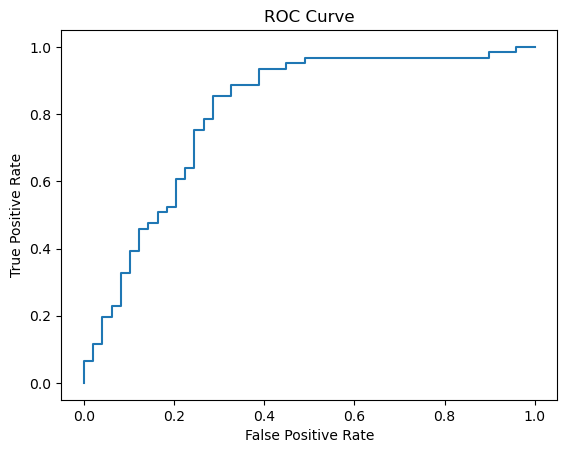

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
y_pred_probas = model_conv1.predict(Xwords_test)
y_pred_probas = [i[0] for i in y_pred_probas]
fpr, tpr, thresholds = roc_curve(y_seq_test, y_pred_probas, pos_label = 'dementia')
#roc_auc = roc_auc_score(y_test, scores)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()

In [ ]:
#predicting classes on test data
from sklearn.metrics import f1_score
predict_x=model_conv1.predict(Xwords_test)

score = []
for theshold in np.arange(0,1,.01):
    classes_x= (predict_x >= theshold).astype(int)
    ideal_score = f1_score(y_nums_test, classes_x)

    score.append(ideal_score)

final = np.argmax(score)

print(final)


4/4 [==============================] - 0s 14ms/step
18


In [ ]:
final = final/100
classes_x = (predict_x >= final).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

print(confusion_matrix(y_nums_test, classes_x))
print(classification_report(y_nums_test, classes_x))

[[30 19]
 [ 4 57]]
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        49
           1       0.75      0.93      0.83        61

    accuracy                           0.79       110
   macro avg       0.82      0.77      0.78       110
weighted avg       0.81      0.79      0.78       110



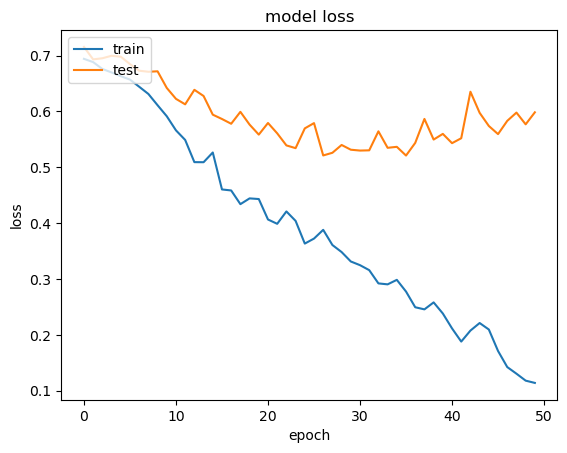

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

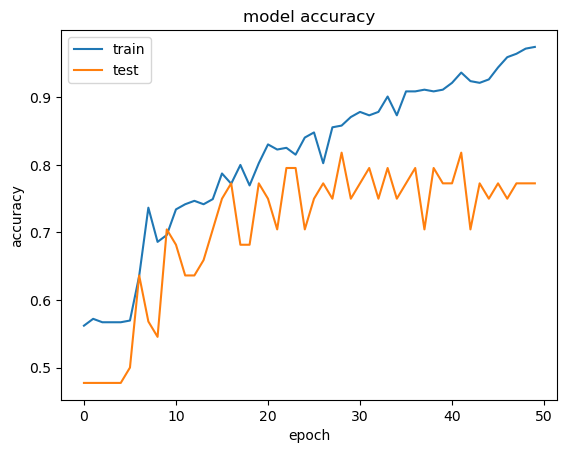

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# SECTION 4:
## Word2Vec

In [ ]:
# conda install -c conda-forge gensim

In [ ]:
import multiprocessing
import gensim

from gensim.models import Word2Vec

In [ ]:
from collections import Counter
from itertools import chain

def print_frequency(words, name):
    counter = Counter(chain.from_iterable(words))
    df_word_distribution = pd.DataFrame(counter.values(), index = counter.keys(), columns = ['Frequency'])
    df_word_distribution.index = df_word_distribution.index.set_names(name)
    df_word_distribution = df_word_distribution.sort_values(by = 'Frequency', ascending = False, axis=0).iloc[:15]
    df_word_distribution = df_word_distribution.pivot_table(columns = name)
    df_word_distribution = df_word_distribution.sort_values(by = 'Frequency', ascending = False, axis=1)
    display(df_word_distribution)

words_control = [s.split() for s in talk_bank_small.loc[talk_bank_small.label == 'control']['text']]
words_dementia = [s.split() for s in talk_bank_small.loc[talk_bank_small.label == 'dementia']['text']]
print_frequency(words_dementia, 'dementia')
print_frequency(words_control, 'control')

dementia      .   the   and   is   uh    a    i   on   to  she's  cookie   in  \
Frequency  3914  2765  1440  795  778  712  554  439  395    375     358  339   

dementia   dishes   it  that  
Frequency     325  294   293

control       .   the   and    is    a   uh   on    i   to  cookie   in   of  \
Frequency  3185  2618  1026  1024  705  536  392  384  382     354  329  285   

control    dishes  she's  her  
Frequency     263    262  240

In [ ]:
text_train, text_test, y_train, y_test = train_test_split(talk_bank_small['text'], talk_bank_small['label'], test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
size_embedding = 100 #Dimensionality of the feature vectors
windows = 2 #Maximum distance between the current and predicted word within a sentence
min_count = 1 #Ignores words with total frequency lower than this
maxlen = 1000 #Length decided for the text (adjusted by padding and truncating)

text_train_splited = [article.split() for article in X_seq_train]
text_train_splited2 = [article.split() for article in talk_bank_small['text']]
w2v_model = gensim.models.Word2Vec(sentences = text_train_splited,
#                                    size = size_embedding,
                                   window = windows,
                                   min_count = min_count)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train_splited2)
text_train_tok = tokenizer.texts_to_sequences(text_train_splited)
word_index = tokenizer.word_index
print('Size of vocabulary: ', len(word_index))

text_train_tok_pad = pad_sequences(text_train_tok, maxlen=maxlen)

Size of vocabulary:  1671


In [ ]:
""" Fix GLOVE and WORD2VEC VECTORIZAITON TO ONLY VECTORIZE ON THE TRAINING SET"""

def w2v_to_keras_weights(model, vocab, size_embedding):
    # Initialize the weight matrix with zeros
    vocab_size = len(vocab) + 1  # Adding 1 to account for padding
    weight_matrix = np.zeros((vocab_size + 1000, size_embedding))

    for word, i in vocab.items():
        # Check if the word is in the model's vocabulary
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
        else:
            # Optionally handle words not found in the model
            weight_matrix[i] = np.zeros(size_embedding)

    return weight_matrix

size_embedding = 100   # Word2Vec model's vector size
embedding_vectors = w2v_to_keras_weights(w2v_model, word_index, size_embedding)


In [ ]:
print(embedding_vectors[1000:1010])

[[-1.90368518e-02  1.24726593e-02 -4.26475098e-03  8.68919212e-03
   1.13484338e-02 -3.04753408e-02  1.46124838e-02  2.92917453e-02
  -5.34124393e-03 -1.51540264e-02 -2.24407879e-03 -1.64307747e-02
   4.91546141e-03  1.44615322e-02 -1.41532498e-03 -6.70580519e-03
   1.24047073e-02 -1.92747675e-02  8.98322277e-03 -2.99599748e-02
   1.53175425e-02  9.25930496e-03  2.19592638e-02 -1.05180396e-02
   7.19191879e-03  1.31741501e-02 -2.50228075e-03 -4.16768686e-04
  -5.99215273e-03 -2.20758934e-03  1.06213763e-02 -8.62973183e-03
   2.12950483e-02 -2.22214647e-02 -1.23791331e-02  1.91840325e-02
   7.63908355e-03 -8.21633171e-03 -1.05351638e-02 -2.45579388e-02
   1.85998287e-02 -7.69640226e-03 -8.75831209e-03 -6.08247658e-03
   2.21617892e-02 -6.50637783e-04 -5.28705213e-03 -4.76318831e-03
   2.07058918e-02  2.58128135e-03 -2.28808494e-03 -4.90611838e-03
   4.79652872e-03 -1.62601599e-03 -8.84398166e-03  1.46141707e-03
  -2.88257981e-03  9.84146539e-03 -2.13163309e-02  3.66880628e-03
  -1.29282

In [ ]:
embedding_vectors.shape

(2672, 100)

## LSTM w/ Word2Vec

In [ ]:
history = History()

model = Sequential()
model.add(Embedding(embedding_vectors.shape[0], output_dim = 100, weights = [embedding_vectors], input_length=100, trainable = False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          267200    
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 384577 (1.47 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 267200 (1.02 MB)
_________________________________________________________________
None


In [ ]:
import os
import tensorflow as tf

checkpoint_path = r"C:\Users\cobus\Desktop\Thesis\check_point"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor="val_loss", save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(Xwords_train, y_nums_train, epochs=45, batch_size=256,verbose = 1,callbacks = [history, cp_callback],validation_split=0.1)  # Pass callback to training


Epoch 1/45
2/2 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5013
Epoch 1: val_loss improved from inf to 0.77473, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 8s 2s/step - loss: 0.6951 - accuracy: 0.5013 - val_loss: 0.7747 - val_accuracy: 0.4773
Epoch 2/45
2/2 [==============================] - ETA: 0s - loss: 0.7064 - accuracy: 0.5671
Epoch 2: val_loss improved from 0.77473 to 0.72825, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 2s 632ms/step - loss: 0.7064 - accuracy: 0.5671 - val_loss: 0.7283 - val_accuracy: 0.4773
Epoch 3/45
2/2 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.5671
Epoch 3: val_loss improved from 0.72825 to 0.69870, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 1s 641ms/step - loss: 0.6869 - accuracy: 0.5671 - val_loss: 0.6987 - val_accuracy: 0.4773
Epoch 4/45
2/2

In [ ]:
os.listdir(checkpoint_dir)


['.ipynb_checkpoints',
 '22ASHA-Saylor.pdf',
 '2305.13331.pdf',
 'checkpoint',
 'check_point.data-00000-of-00001',
 'check_point.index',
 'Comparative_study_of_Deep_Classifiers_for_Early_Dementia_Detection_using_Speech_Transcripts.pdf',
 'Control-20240216T032309Z-001',
 'Control-20240216T032309Z-001.zip',
 'control_dataframe.csv',
 'control_output',
 'control_sentences.csv',
 'data augmentation.ipynb',
 'Dementia Detection from Speech Using Machine Learning.pdf',
 'Dementia-20240216T032306Z-001',
 'Dementia-20240216T032306Z-001.zip',
 'Dementia_classification_using_attention_mechanism_on_audio_data.pdf',
 'dementia_dataframe.csv',
 'dementia_output',
 'dementia_sentences.csv',
 'GitHubDesktopSetup-x64 (1).exe',
 'glove.42B.300d',
 'glove.42B.300d.zip',
 'harmonized-toolkit-main',
 'lit-review-writing.docx',
 'LITERATURE REVIEW DRAFT.docx',
 'part.csv',
 'requirements.txt',
 'saved_models',
 'Stacked_Deep_Dense_Neural_Network_Model_to_Predict_Alzheimers_Dementia_Using_Audio_Transcript_D

In [ ]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(Xwords_test, y_nums_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
model.save('saved_models/model_word2vec_lstm_small.h5')

4/4 [==============================] - 0s 32ms/step


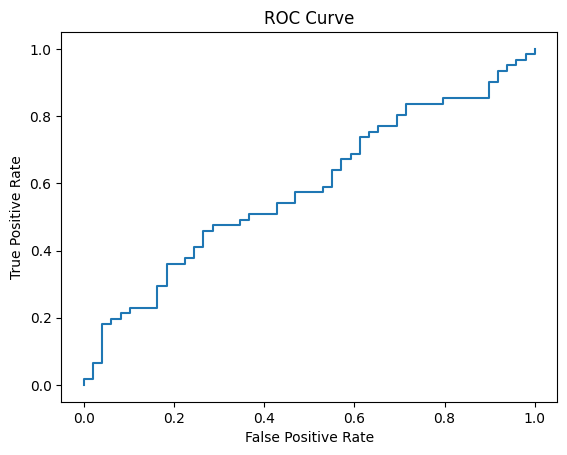

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
y_pred_probas = model.predict(Xwords_test)
y_pred_probas = [i[0] for i in y_pred_probas]
fpr, tpr, thresholds = roc_curve(y_seq_test, y_pred_probas, pos_label = 'dementia')
# roc_auc = roc_auc_score(y_test, scores)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()

In [ ]:
#predicting classes on test data
from sklearn.metrics import f1_score
predict_x=model.predict(Xwords_test)

score = []
for theshold in np.arange(0,1,.01):
    classes_x= (predict_x >= theshold).astype(int)
    ideal_score = f1_score(y_nums_test, classes_x)

    score.append(ideal_score)

final = np.argmax(score)

print(final)



4/4 [==============================] - 0s 30ms/step
0


In [ ]:
final = final/100
classes_x = (predict_x >= final).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

print(confusion_matrix(y_nums_test, classes_x))
print(classification_report(y_nums_test, classes_x))

[[ 0 49]
 [ 0 61]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.55      1.00      0.71        61

    accuracy                           0.55       110
   macro avg       0.28      0.50      0.36       110
weighted avg       0.31      0.55      0.40       110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


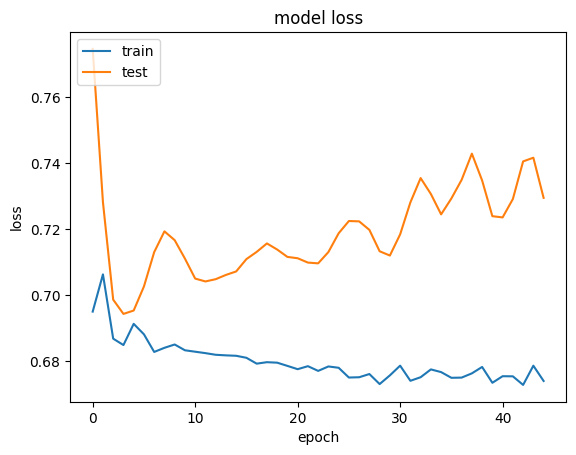

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

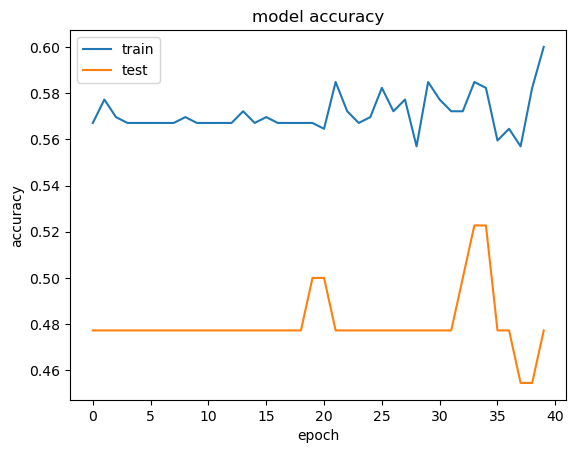

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Word2Vec Bidirectional LSTM

In [ ]:

history = History()
model_bilstm = Sequential()
model_bilstm.add(Embedding(embedding_vectors.shape[0], output_dim = 100, weights = [embedding_vectors], input_length=100, trainable = False))
model_bilstm.add(Bidirectional(LSTM(128, recurrent_dropout=0.2)))
model_bilstm.add(Dense(1, activation='sigmoid'))
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_bilstm.summary())


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 100)          267200    
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 1)                 257       
                                                                 
Total params: 501,953
Trainable params: 234,753
Non-trainable params: 267,200
_________________________________________________________________
None


In [ ]:
import os
import tensorflow as tf

checkpoint_path = r"C:\Users\cobus\Desktop\Thesis\check_point"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor="val_loss", save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model_bilstm.fit(Xwords_train, y_nums_train, epochs=40, batch_size=256,verbose = 1,callbacks = [history, cp_callback],validation_split=0.1)  # Pass callback to training


Epoch 1/40
2/2 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.4734
Epoch 1: val_loss improved from inf to 0.74741, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 12s 3s/step - loss: 0.6930 - accuracy: 0.4734 - val_loss: 0.7474 - val_accuracy: 0.4773
Epoch 2/40
2/2 [==============================] - ETA: 0s - loss: 0.6942 - accuracy: 0.5671
Epoch 2: val_loss improved from 0.74741 to 0.73811, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 7s 3s/step - loss: 0.6942 - accuracy: 0.5671 - val_loss: 0.7381 - val_accuracy: 0.4773
Epoch 3/40
2/2 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.5747
Epoch 3: val_loss did not improve from 0.73811
2/2 [==============================] - 7s 3s/step - loss: 0.6796 - accuracy: 0.5747 - val_loss: 0.7431 - val_accuracy: 0.3864
Epoch 4/40
2/2 [==============================] - ETA: 0s - loss: 0.6934 - accurac

2/2 [==============================] - 6s 3s/step - loss: 0.6499 - accuracy: 0.6228 - val_loss: 0.7491 - val_accuracy: 0.5227
Epoch 31/40
2/2 [==============================] - ETA: 0s - loss: 0.6555 - accuracy: 0.5899
Epoch 31: val_loss did not improve from 0.71774
2/2 [==============================] - 8s 3s/step - loss: 0.6555 - accuracy: 0.5899 - val_loss: 0.7635 - val_accuracy: 0.4773
Epoch 32/40
2/2 [==============================] - ETA: 0s - loss: 0.6527 - accuracy: 0.5873
Epoch 32: val_loss did not improve from 0.71774
2/2 [==============================] - 8s 3s/step - loss: 0.6527 - accuracy: 0.5873 - val_loss: 0.7565 - val_accuracy: 0.4773
Epoch 33/40
2/2 [==============================] - ETA: 0s - loss: 0.6499 - accuracy: 0.6278
Epoch 33: val_loss did not improve from 0.71774
2/2 [==============================] - 8s 3s/step - loss: 0.6499 - accuracy: 0.6278 - val_loss: 0.7571 - val_accuracy: 0.3864
Epoch 34/40
2/2 [==============================] - ETA: 0s - loss: 0.6490

In [ ]:
os.listdir(checkpoint_dir)

['.ipynb_checkpoints',
 '22ASHA-Saylor.pdf',
 '2305.13331.pdf',
 'checkpoint',
 'check_point.data-00000-of-00001',
 'check_point.index',
 'Comparative_study_of_Deep_Classifiers_for_Early_Dementia_Detection_using_Speech_Transcripts.pdf',
 'Control-20240216T032309Z-001',
 'Control-20240216T032309Z-001.zip',
 'control_dataframe.csv',
 'control_output',
 'control_sentences.csv',
 'data augmentation.ipynb',
 'Dementia Detection from Speech Using Machine Learning.pdf',
 'Dementia-20240216T032306Z-001',
 'Dementia-20240216T032306Z-001.zip',
 'Dementia_classification_using_attention_mechanism_on_audio_data.pdf',
 'dementia_dataframe.csv',
 'dementia_output',
 'dementia_sentences.csv',
 'GitHubDesktopSetup-x64 (1).exe',
 'glove.42B.300d',
 'glove.42B.300d.zip',
 'harmonized-toolkit-main',
 'lit-review-writing.docx',
 'LITERATURE REVIEW DRAFT.docx',
 'part.csv',
 'requirements.txt',
 'saved_models',
 'Stacked_Deep_Dense_Neural_Network_Model_to_Predict_Alzheimers_Dementia_Using_Audio_Transcript_D

In [ ]:
# Loads the weights
model_bilstm.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model_bilstm.evaluate(Xwords_test, y_nums_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 1s - loss: 0.6895 - accuracy: 0.5182 - 694ms/epoch - 174ms/step
Restored model, accuracy: 51.82%


In [ ]:
model.save('saved_models/model_word2vec_bilstm_small.h5')

4/4 [==============================] - 2s 181ms/step


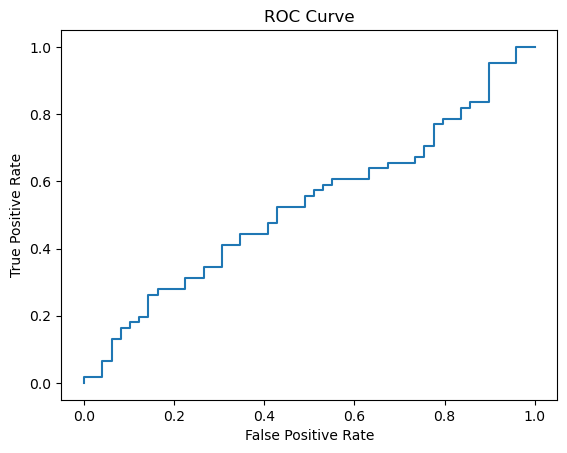

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
y_pred_probas = model_bilstm.predict(Xwords_test)
y_pred_probas = [i[0] for i in y_pred_probas]
fpr, tpr, thresholds = roc_curve(y_seq_test, y_pred_probas, pos_label = 'dementia')
# roc_auc = roc_auc_score(y_test, scores)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()

In [ ]:
#predicting classes on test data
from sklearn.metrics import f1_score
predict_x=model_bilstm.predict(Xwords_test)

score = []
for theshold in np.arange(0,1,.01):
    classes_x= (predict_x >= theshold).astype(int)
    ideal_score = f1_score(y_nums_test, classes_x)

    score.append(ideal_score)

final = np.argmax(score)

print(final)



4/4 [==============================] - 1s 170ms/step
48


In [ ]:
final = final/100
classes_x = (predict_x >= final).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

print(confusion_matrix(y_nums_test, classes_x))
print(classification_report(y_nums_test, classes_x))

[[ 2 47]
 [ 1 60]]
              precision    recall  f1-score   support

           0       0.67      0.04      0.08        49
           1       0.56      0.98      0.71        61

    accuracy                           0.56       110
   macro avg       0.61      0.51      0.40       110
weighted avg       0.61      0.56      0.43       110



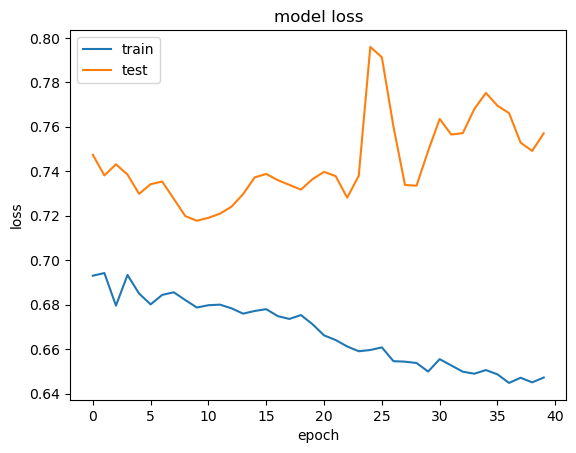

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

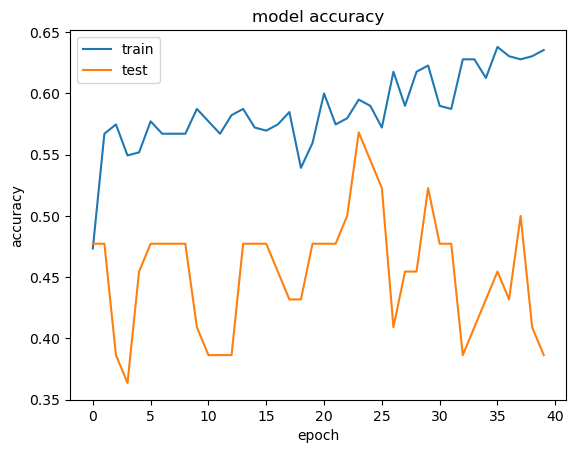

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Word2Vec CNN LSTM

In [ ]:
history = History()
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(embedding_vectors.shape[0], output_dim = 100, weights = [embedding_vectors], input_length=100, trainable = False))
    model_conv.add(Dropout(0.1))
    model_conv.add(Conv1D(32, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(64))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model_conv

In [ ]:
import os
import tensorflow as tf

checkpoint_path = r"C:\Users\cobus\Desktop\Thesis\check_point"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor="val_loss", save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback

model_conv1 = create_conv_model()

model_conv1.fit(Xwords_train, y_nums_train, epochs=45, batch_size=256,verbose = 1,callbacks = [history, cp_callback],validation_split=0.1)  # Pass callback to training



Epoch 1/45
2/2 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.4810
Epoch 1: val_loss improved from inf to 0.71621, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 5s 984ms/step - loss: 0.6930 - accuracy: 0.4810 - val_loss: 0.7162 - val_accuracy: 0.4773
Epoch 2/45
2/2 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.5671
Epoch 2: val_loss improved from 0.71621 to 0.71598, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 1s 358ms/step - loss: 0.6870 - accuracy: 0.5671 - val_loss: 0.7160 - val_accuracy: 0.4773
Epoch 3/45
2/2 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5671
Epoch 3: val_loss improved from 0.71598 to 0.70389, saving model to C:\Users\cobus\Desktop\Thesis\check_point
2/2 [==============================] - 1s 332ms/step - loss: 0.6855 - accuracy: 0.5671 - val_loss: 0.7039 - val_accuracy: 0.4773
Epoch 4/45


In [ ]:
# Loads the weights
model_conv1.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model_conv1.evaluate(Xwords_test, y_nums_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 0s - loss: 0.6881 - accuracy: 0.5545 - 109ms/epoch - 27ms/step
Restored model, accuracy: 55.45%


In [ ]:
model_conv1.save('saved_models/model_cnnlstm_conv1_small.h5')

4/4 [==============================] - 1s 16ms/step


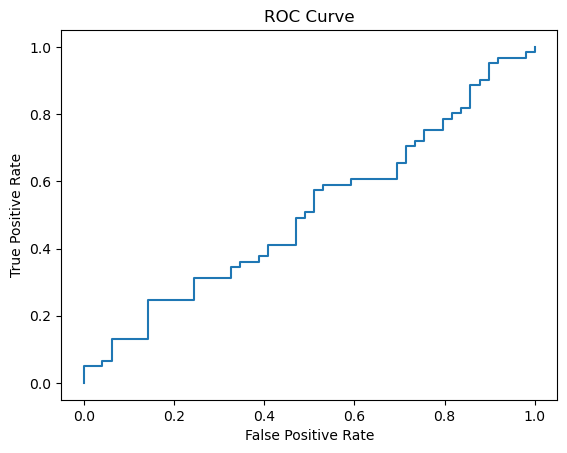

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
y_pred_probas = model_conv1.predict(Xwords_test)
y_pred_probas = [i[0] for i in y_pred_probas]
fpr, tpr, thresholds = roc_curve(y_seq_test, y_pred_probas, pos_label = 'dementia')
#roc_auc = roc_auc_score(y_test, scores)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()

In [ ]:
#predicting classes on test data
from sklearn.metrics import f1_score
predict_x=model_conv1.predict(Xwords_test)

score = []
for theshold in np.arange(0,1,.01):
    classes_x= (predict_x >= theshold).astype(int)
    ideal_score = f1_score(y_nums_test, classes_x)

    score.append(ideal_score)

final = np.argmax(score)

print(final)


4/4 [==============================] - 0s 16ms/step
0


In [ ]:
final = final/100
classes_x = (predict_x >= final).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

print(confusion_matrix(y_nums_test, classes_x))
print(classification_report(y_nums_test, classes_x))

[[ 0 49]
 [ 0 61]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.55      1.00      0.71        61

    accuracy                           0.55       110
   macro avg       0.28      0.50      0.36       110
weighted avg       0.31      0.55      0.40       110



C:\Users\cobus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cobus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


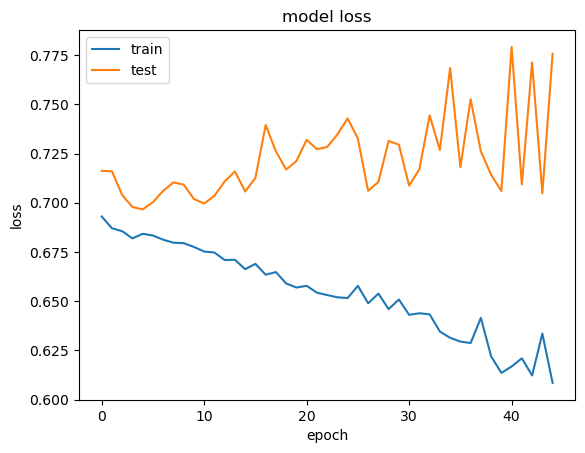

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

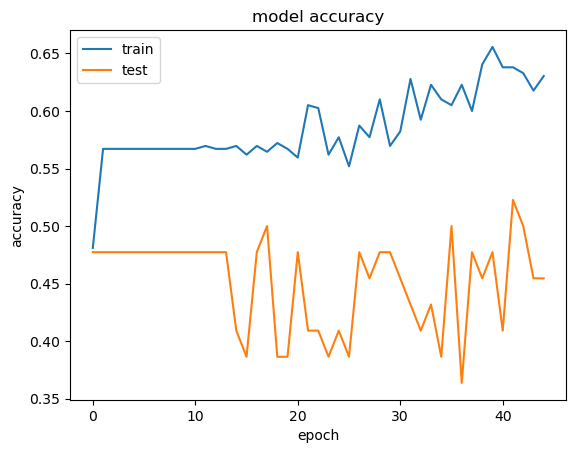

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Feature importance for ML models

### RF w/ bigrams

In [ ]:
import pickle
import shap

In [ ]:
rf_bi = pickle.load(open("C:\\Users\\cobus\\Desktop\\Thesis\\rf_model_bigrams.pickle", mode = 'rb'))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report
# rf_bi = RandomForestClassifier()
rf_bi.fit(X_train, y_train)
print(model_rf)
y_pred = rf_bi.predict(X_test)
acc = accuracy_score(y_test, y_pred)

labels = [0, 1]
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average=None, labels= labels))
print(classification_report(y_test,y_pred))

RandomForestClassifier()
0.8181818181818182
[[35 13]
 [ 7 55]]
(array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0, 0], dtype=int64))
              precision    recall  f1-score   support

     control       0.83      0.73      0.78        48
    dementia       0.81      0.89      0.85        62

    accuracy                           0.82       110
   macro avg       0.82      0.81      0.81       110
weighted avg       0.82      0.82      0.82       110



C:\Users\cobus\AppData\Roaming\Python\Python39\site-packages\numpy\lib\arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\cobus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cobus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cobus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.p

In [ ]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(rf_bi)

In [ ]:
# help(shap.plots.force)

In [ ]:
choosen_instance.shape

(1, 610)

In [ ]:
shap_values.shape

(1, 610, 2)

actual class is dementia


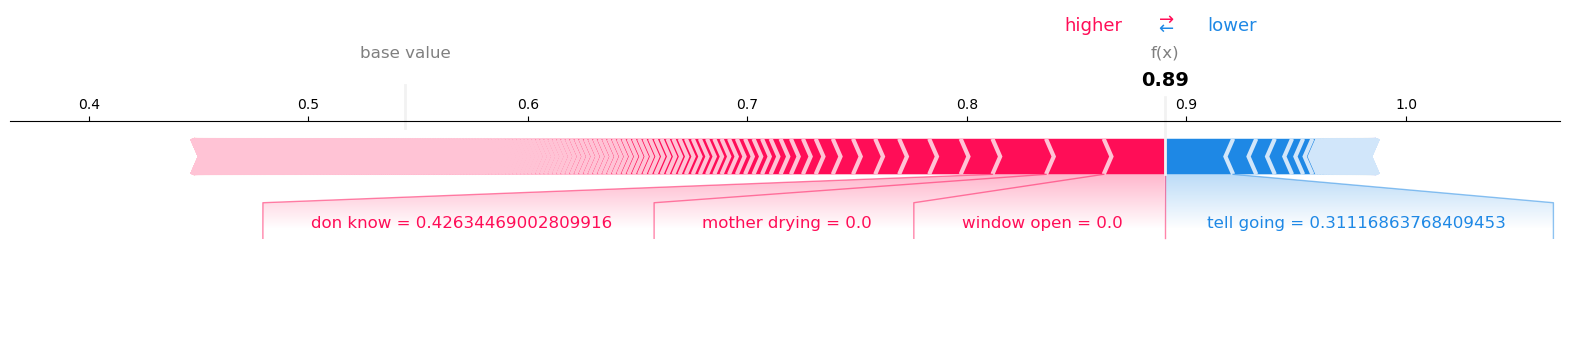

In [ ]:
# Calculate Shap values
print("actual class is", y_test[25])
X_words_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())
choosen_instance = X_words_test.iloc[[25], :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value[1], shap_values[:, :, 1], choosen_instance, matplotlib=True)

actual class is dementia


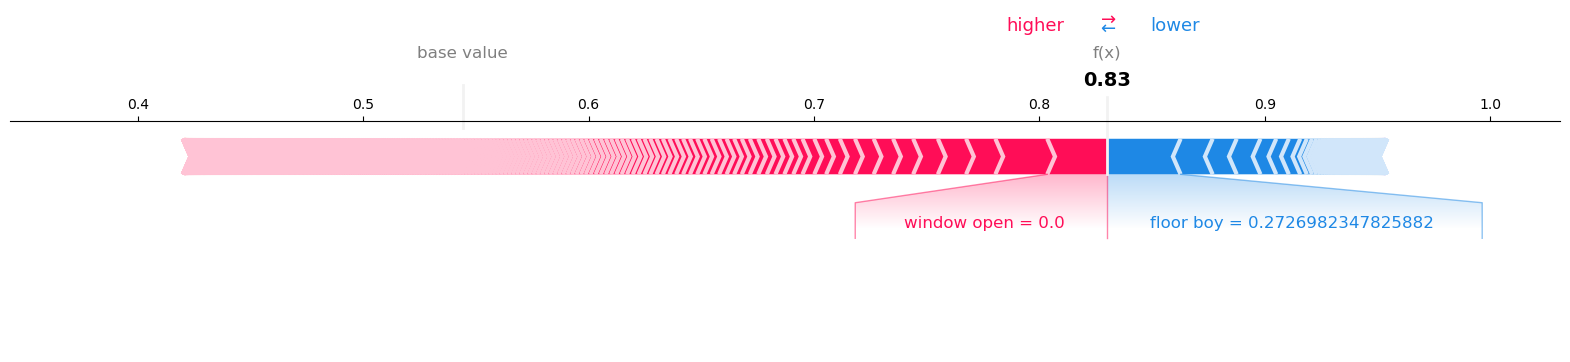

In [ ]:
# Calculate Shap values
print("actual class is", y_test[17])
X_words_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())
choosen_instance = X_words_test.iloc[[17], :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value[1], shap_values[:, :, 1], choosen_instance, matplotlib=True)

actual class is dementia


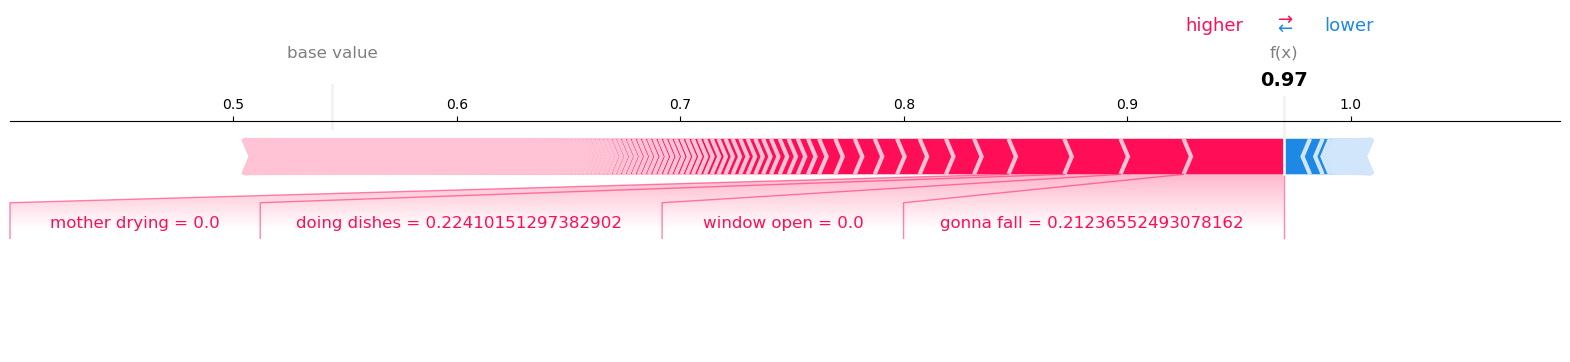

In [ ]:
# Calculate Shap values
print("actual class is", y_test[5])
X_words_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())
choosen_instance = X_words_test.iloc[[5], :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value[1], shap_values[:, :, 1], choosen_instance, matplotlib=True)

actual class is control


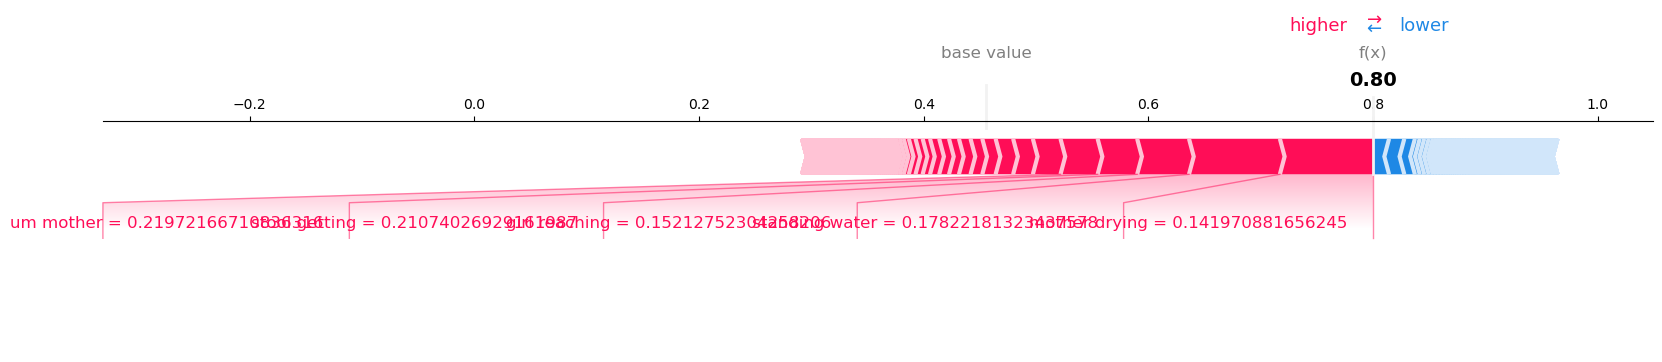

In [ ]:
# Calculate Shap values
print("actual class is", y_test[12])
X_words_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())
choosen_instance = X_words_test.iloc[[12], :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[:, :, 0], choosen_instance, matplotlib=True)

In [ ]:
shap_values = explainer.shap_values(X_words_test)

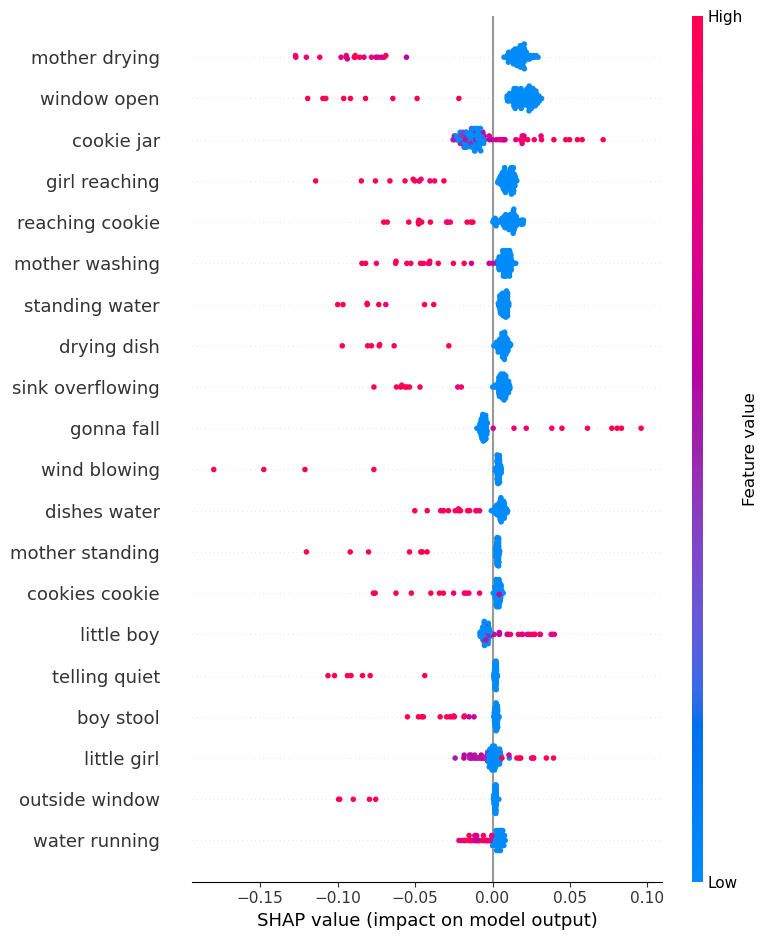

In [ ]:

shap.summary_plot(shap_values[:, :, 1], X_words_test)

### RF unigrams and bigrams

In [ ]:
import pickle
import shap

rf = pickle.load(open("C:\\Users\\cobus\\Desktop\\Thesis\\rf_model.pickle", mode = 'rb'))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(model_rf)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

labels = [0, 1]
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average=None, labels= labels))
print(classification_report(y_test,y_pred))

RandomForestClassifier()
0.7818181818181819
[[31 17]
 [ 7 55]]
(array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0, 0], dtype=int64))
              precision    recall  f1-score   support

     control       0.82      0.65      0.72        48
    dementia       0.76      0.89      0.82        62

    accuracy                           0.78       110
   macro avg       0.79      0.77      0.77       110
weighted avg       0.79      0.78      0.78       110



C:\Users\cobus\AppData\Roaming\Python\Python39\site-packages\numpy\lib\arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
C:\Users\cobus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cobus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cobus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.p

In [ ]:
explainer = shap.TreeExplainer(rf)

In [ ]:
# Calculate Shap values
print("actual class is", y_test[25])
X_words_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())
choosen_instance = X_words_test.iloc[[25], :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value[1], shap_values[:, :, 1], choosen_instance, matplotlib=True)

actual class is dementia


In [ ]:
# Calculate Shap values
print("actual class is", y_test[17])
X_words_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())
choosen_instance = X_words_test.iloc[[17], :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[:, :, 0], choosen_instance, matplotlib=True)

actual class is dementia


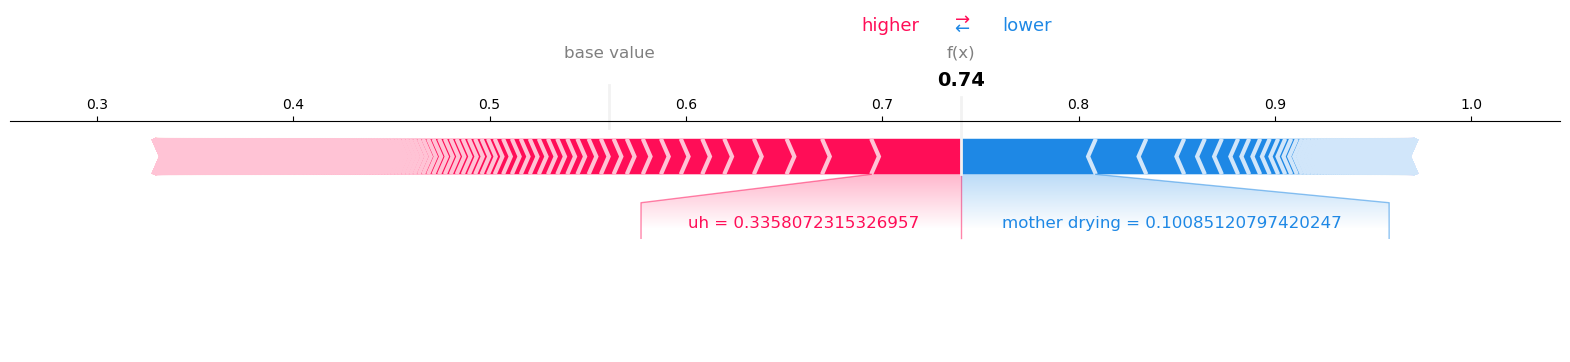

In [ ]:
# Calculate Shap values
print("actual class is", y_test[42])
X_words_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())
choosen_instance = X_words_test.iloc[[42], :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value[1], shap_values[:, :, 1], choosen_instance, matplotlib=True)

actual class is control


visualizing
matplotlibing
drawing additive plot


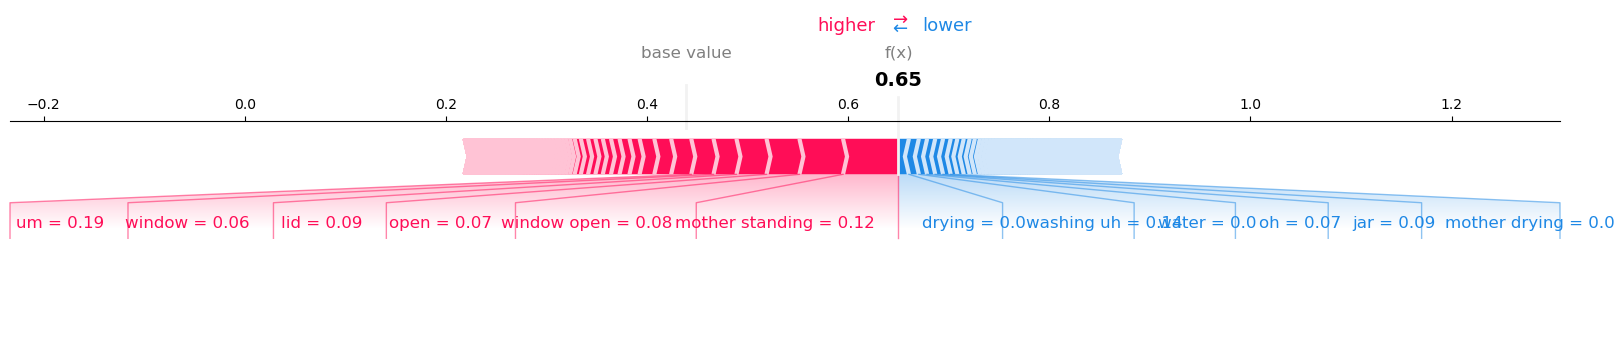

In [ ]:
# Calculate Shap values
from importlib import reload
import shap
reload(shap)


print("actual class is", y_test[22])
X_words_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())
choosen_instance = X_words_test.iloc[[22], :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[:, :, 0], choosen_instance, matplotlib=True)

In [ ]:
shap_values = explainer.shap_values(X_words_test)

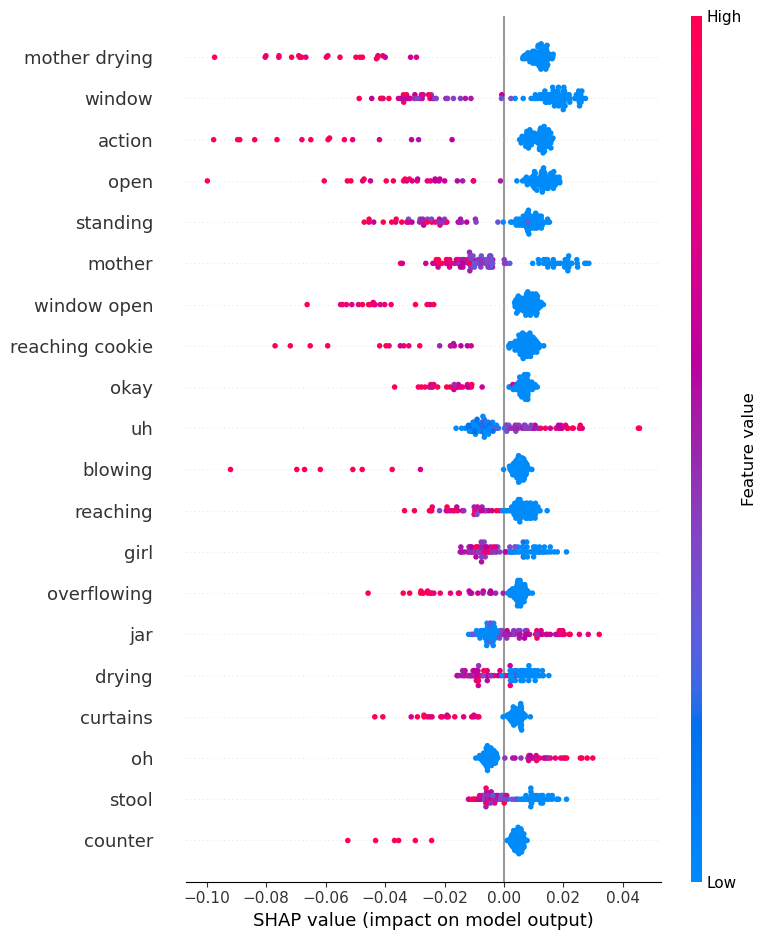

In [ ]:
shap.summary_plot(shap_values[:, :, 1], X_words_test)

### Feature importance logistic regression

#### with uni-grams and bi-grams

In [ ]:
import pickle
lg = pickle.load(open(r"C:\Users\cobus\Desktop\Thesis\lr_model.pickle", mode = 'rb'))

C:\Users\cobus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


actual class is control


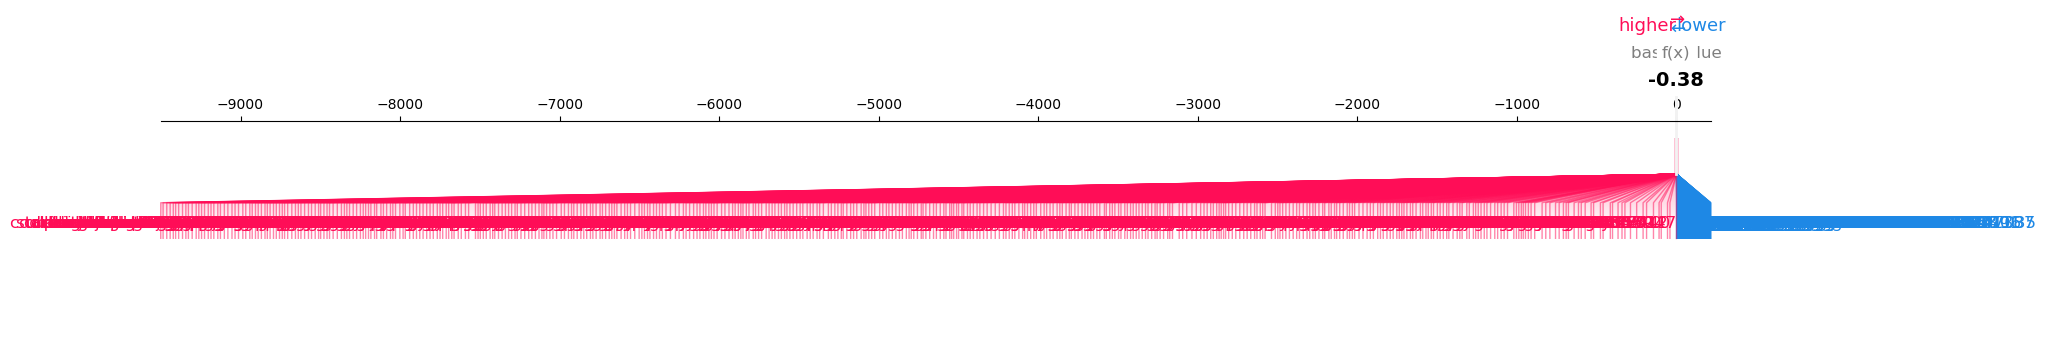

In [ ]:
import shap
model = lg
masker = shap.maskers.Independent(data = X_train)
explainer = shap.LinearExplainer(model, masker = masker)
print("actual class is", y_test[22])

X_words_test = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())
choosen_instance = X_words_test.iloc[[22], :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, choosen_instance, matplotlib=True)

In [ ]:
shap_values.shape

(1, 954)

In [ ]:

# shap.summary_plot(shap_values[:, :, 1], X_words_test)

In [ ]:
explainer = shap.LinearExplainer(lg,
                                 X_train,
                                 feature_perturbation="interventional")

In [ ]:
shap_values = explainer.shap_values(X_test)
shap_values[0]

array([ 4.92558678e-02,  7.25222212e-04,  7.13819632e-05,  3.17777240e-04,
        1.46842523e-05, -0.00000000e+00, -0.00000000e+00,  4.49323717e-04,
       -0.00000000e+00,  4.58640663e-04, -9.56930220e-05,  1.16159195e-03,
        0.00000000e+00,  6.42951005e-04,  4.34376091e-03,  3.61178560e-03,
       -8.52741554e-04,  5.00779123e-04,  3.66755231e-04,  7.54086363e-04,
       -1.68064866e-03, -0.00000000e+00, -2.01110972e-03, -1.00721980e-04,
       -1.28407765e-03,  7.60032193e-04,  1.20668107e-02,  1.38648618e-03,
        1.61140536e-04,  3.72475923e-03,  4.82297858e-04,  2.67279820e-04,
        7.88078815e-04,  4.85395188e-02,  1.41361768e-04,  1.76850787e-03,
       -3.59911167e-03,  2.60685054e-04,  6.58609369e-04, -1.20893545e-03,
        4.81085083e-04,  1.54544640e-03, -3.37947659e-04, -6.76074339e-04,
       -3.04070379e-04, -2.60658331e-03,  1.15887182e-03,  6.05123647e-04,
        3.16870177e-03,  7.92905357e-03,  3.32495671e-04, -4.02701493e-03,
        0.00000000e+00,  

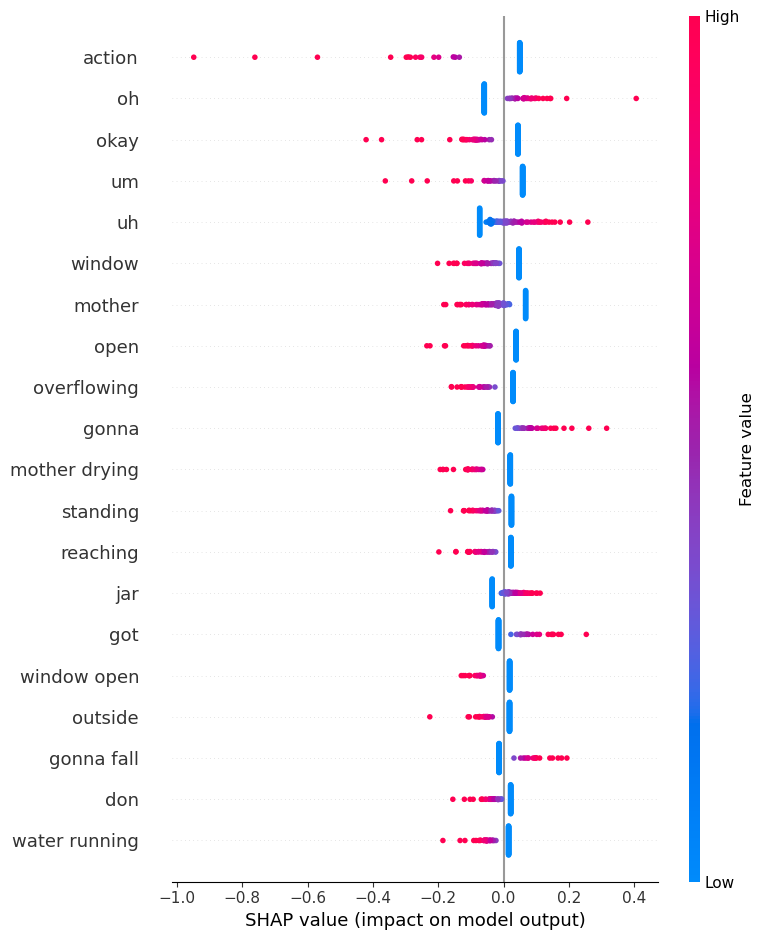

In [ ]:

shap.summary_plot(shap_values,
                  X_test,
                  feature_names=vectorizer.get_feature_names_out())

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

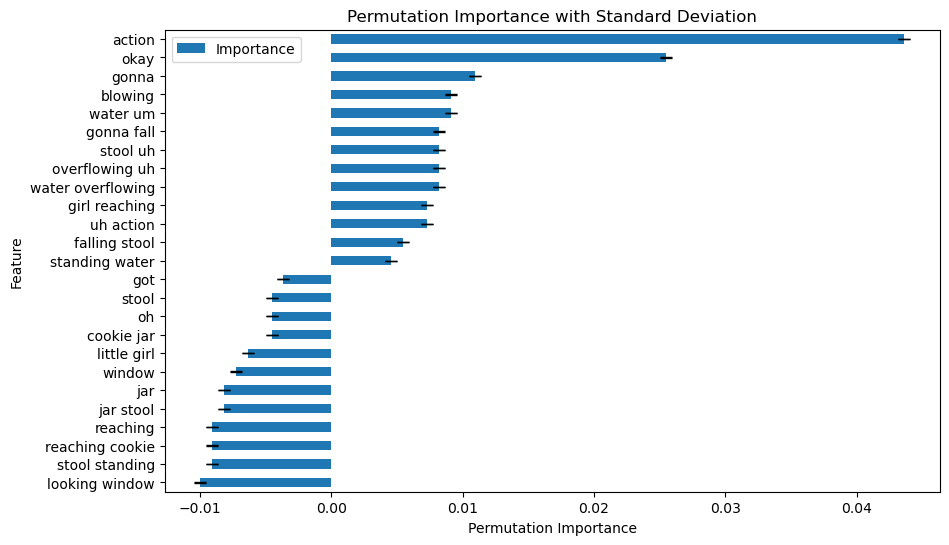

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(lg, X_test, y_test, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': vectorizer.get_feature_names_out(),
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values(
    'Importance',
    ascending=True,
    key=lambda imp: abs(imp))
# threshold = 0.001
# feature_importance = feature_importance.loc[feature_importance['Importance'].abs() >= threshold, :]
# print(feature_importance.shape)
feature_importance = feature_importance.iloc[-25:, :]
feature_importance = feature_importance.sort_values('Importance')

ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')